# **&#9776; DESAFIO VI**
---

# **:: Estrutura da Base de Dados**

### A base fictícia conterá 150 instâncias com as seguintes variáveis:


**ID_Registro** – Identificador único

**Tipo_Eletronico** – Categoria do item (celular, computador, TV, bateria, etc.)

**Ano_Fabricacao** – Ano de fabricação do dispositivo

**Origem** – Origem do descarte (urbana, rural, industrial, governamental)

**Destino_Final** – Local de descarte (cooperativa, lixão, reciclagem formal, rio, aterro controlado)

**Peso_kg** – Peso aproximado do equipamento

**Nivel_Toxico** – Grau de toxicidade (baixo, médio, alto, crítico)

**Custo_Reciclagem_R$** – Estimativa de custo de reciclagem


Este notebook tem como objetivo realizar uma análise exploratória e descritiva do dataset `desafio6_lixo_eletronico.csv`, contendo informações sobre descarte de resíduos eletrônicos.


---

# **:: Base de Dados**

<h4 align="justify">O dataset está disponível para download através do link a seguir:</h4>
<h4 align="justify"><a DOWNLOAD href="https://drive.google.com/file/d/1mZI1yIT5yJUpw-TWi7du3NfOoaSdT7rt/view?usp=drive_link" target="_blank" download="desafio6_lixo_eletronico.csv">desafio6_lixo_eletronico.csv</a></h4>

## 1. Exploração Inicial dos Dados

1. Carregue a base "desafio6_lixo_eletronico.csv" em um DataFrame do Pandas
2. Faça uma análise exploratória (shape, tipos de variáveis, estatísticas descritivas) 
3. Apresente o total de valores ausentes e duplicados
### 1.1 Load data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import seaborn as sns

#RdBu_r
# Leiura dos dados
path='/home/akel/PycharmProjects/I2A2/data/raw/'
file='desafio6_lixo_eletronico.csv'
dfo = pd.read_csv(path+file)
dfo = dfo.rename(columns={'Custo_Reciclagem_R$': 'Custo_Reciclagem'})
#display(dfo.head(5))

### 1.2 Analise exploratoria 

In [2]:
df=dfo.copy()

print("=" * 50)
print("ANÁLISE EXPLORATÓRIA DO DATAFRAME")
print("=" * 50)
# Informações sobre o shape dos dados
print(f"\n📊 DIMENSÕES: {df.shape[0]} linhas × {df.shape[1]} colunas")

# Informações sobre tipos de dados
print(f"\n🔧 TIPOS DE DADOS:")
print(df.dtypes.to_frame('Tipo').to_markdown())

# Estatísticas numéricas
numericas = df.select_dtypes(include=['int64', 'float64'])
if not numericas.empty:
    # Obter estatísticas descritivas
    descricao = numericas.describe()
    
    # Adicionar linha de valores nulos
    valores_nulos = numericas.isnull().sum()
    descricao.loc['null'] = valores_nulos
    print(f"\n📈 ESTATÍSTICAS NUMÉRICAS:")

    print(descricao.to_markdown())
else:
    print("❌ Nenhuma variável numérica encontrada")


colunas_categoricas = [
    'Tipo_Eletronico', 
    'Origem', 
    'Destino_Final', 
    'Nivel_Toxico', 
    'Educacao_Ambiental'
]

# Estatísticas categórica
print(f"\n📊 ESTATÍSTICAS CATEGÓRICAS:")
resumo_categoricas = []
for coluna in colunas_categoricas:
    num_unicos = df[coluna].nunique()
    valores = df[coluna].value_counts().head(3)
    top_valores = ", ".join([f"{k} ({v})" for k, v in valores.items()])    
    resumo_categoricas.append({
        'Variável': coluna,
        'Valores Únicos': num_unicos,
        'Top 3 Valores': top_valores,
        'Valores Nulos': df[coluna].isnull().sum()  })
resumo_df = pd.DataFrame(resumo_categoricas)
print(resumo_df.to_markdown(index=False))
print('\n')

# Contagem de Duplicatas
duplicatas = df.duplicated().sum()
print("=" * 50)
print("🔍 VERIFICAÇÃO DE DUPLICATAS")
print(f"Total de linhas duplicadas: {duplicatas}")
print("=" * 50)

print('\n')

# Contagem de Nulos
print("🔍VERIFICAÇÃO DE VALORES NULOS:")
print(f" Total de valores nulos: {df.isnull().sum().sum()}")
print("=" * 50)
print("  NULOS POR COLUNA:")
print("=" * 50)
nulos_por_coluna = df.isnull().sum()
#nulos_por_coluna = nulos_por_coluna[nulos_por_coluna > 0]  # Mostra apenas colunas com nulos

#if len(nulos_por_coluna) > 0:
print(nulos_por_coluna.to_frame('Quantidade de Nulos').to_markdown())
print("=" * 50)
print("=" * 50)

ANÁLISE EXPLORATÓRIA DO DATAFRAME

📊 DIMENSÕES: 150 linhas × 11 colunas

🔧 TIPOS DE DADOS:
|                    | Tipo    |
|:-------------------|:--------|
| ID_Registro        | int64   |
| Tipo_Eletronico    | object  |
| Ano_Fabricacao     | int64   |
| Origem             | object  |
| Destino_Final      | object  |
| Peso_kg            | float64 |
| Nivel_Toxico       | object  |
| Custo_Reciclagem   | float64 |
| Municipio          | object  |
| Educacao_Ambiental | object  |
| Data_Descarte      | object  |

📈 ESTATÍSTICAS NUMÉRICAS:
|       |   ID_Registro |   Ano_Fabricacao |   Peso_kg |   Custo_Reciclagem |
|:------|--------------:|-----------------:|----------:|-------------------:|
| count |      150      |        150       |  135      |           135      |
| mean  |       72.7333 |       2008.65    |   25.5156 |           103.103  |
| std   |       43.1634 |          8.83338 |   13.9163 |            56.2429 |
| min   |        1      |       1995       |    1.71   |       

### Comentários
1. Origem: 33% Governamental, contra 25% Urbana e 21% Industrial (válidos). setor público tem papel central na geração de lixo eletrônico.Isso abre espaço para políticas públicas direcionadas: programas de descarte correto nas repartições podem ter impacto direto e rápido.
2. Nivel_Toxico está bem distribuído (27% Alto, 27% Baixo, 26% Médio, 20% da 4ª categoria).Ou seja, não há predominância clara de resíduos “inofensivos”: grande parte dos descartes tem risco ambiental significativo, reforçando a urgência de medidas preventivas.

## 2. Limpeza e Padronização
1. Identifique e trate valores inconsistentes (ex.: "reciclagem formal" e "Reciclagem Formal")
2. Corrija erros de digitação e padronize todas as colunas categóricas.
3. Elimine duplicatas mantendo apenas registros válidos.

### a) Variaveis Categóricas
* As variaveis foram convertidades para minusculas;
* A designação **'NaN'** foi substituido por **"Desconhecido"** a fim de preservar a informação;
* O Valor especifico **urbana** for trocado por **urbano**

In [3]:
# Padronização de variaveis categoricas
colunas_categoricas = [
    'Tipo_Eletronico', 
    'Origem', 
    'Destino_Final', 
    'Nivel_Toxico', 
    'Educacao_Ambiental'
]

# Converter todas as colunas para minúsculas
for coluna in colunas_categoricas:
    df[coluna] = df[coluna].str.lower()
    
# transformando valores nulos e desconhecido
for coluna in colunas_categoricas[:3]:  
    df[coluna] = df[coluna].fillna("desconhecido")

# Correção valores específicos
df['Origem'] = df['Origem'].replace({'urbana': 'urbano'})

print(f"\n{'='*80}")
print("📊 VALORES ÚNICOS APÓS PADRONIZAÇÃO")
print(f"{'='*80}")

for coluna in colunas_categoricas:
    print(f"\n🎯 {coluna}:")
    print(f"   Valores únicos: {df[coluna].nunique()}")
    print(f"   Valores: {df[coluna].unique()}")


📊 VALORES ÚNICOS APÓS PADRONIZAÇÃO

🎯 Tipo_Eletronico:
   Valores únicos: 8
   Valores: ['impressora' 'bateria' 'geladeira' 'tv' 'desconhecido' 'computador'
 'celular' 'tablet']

🎯 Origem:
   Valores únicos: 5
   Valores: ['urbano' 'governamental' 'industrial' 'rural' 'desconhecido']

🎯 Destino_Final:
   Valores únicos: 6
   Valores: ['aterro controlado' 'cooperativa' 'reciclagem formal' 'lixão'
 'desconhecido' 'rio']

🎯 Nivel_Toxico:
   Valores únicos: 4
   Valores: ['alto' 'baixo' 'médio' 'crítico']

🎯 Educacao_Ambiental:
   Valores únicos: 2
   Valores: ['não' 'sim']


### b) Variaveis Númericas
Para as variaveis **númericas** (***Peso_kg*** e ***Custo_Reciclagem***) avaliamos as estatisticas descritivas e notamos que média e médiana são muito proximos, indicando dados quase simétricos. Desta forma, uma abordagem simples e direta é a **atribuição da mediana para os dados NaN**, por garantir 
a preservação dos dados e ser menos sensivel a outliers que a média.

comentar sobre mudanças nos valores.

In [4]:
# Variaveis Numéricas
colunas_numericas=['Peso_kg','Custo_Reciclagem']
for coluna in colunas_numericas:
    df[coluna] = df[coluna].fillna(df[coluna].median())

# Estatísticas numéricas
numericas = df.select_dtypes(include=['int64', 'float64'])
descricao = numericas.describe()
print(f"\n📈 ESTATÍSTICAS NUMÉRICAS 2:")
print(descricao.to_markdown())

# Detalhamento de nulos por coluna
print("=" * 50)
print("  NULOS POR COLUNA:")
print("=" * 50)
nulos_por_coluna = df.isnull().sum()
nulos_por_coluna = df.isnull().sum()
#nulos_por_coluna = nulos_por_coluna[nulos_por_coluna > 0]  # Mostra apenas colunas com nulos

#if len(nulos_por_coluna) > 0:
print(nulos_por_coluna.to_frame('Quantidade de Nulos').to_markdown())
print("=" * 50)
print("🔍 VERIFICAÇÃO DE DUPLICATAS")
duplicatas = df.duplicated().sum()
print(f"Total de linhas duplicadas: {duplicatas}")
print("=" * 50)



📈 ESTATÍSTICAS NUMÉRICAS 2:
|       |   ID_Registro |   Ano_Fabricacao |   Peso_kg |   Custo_Reciclagem |
|:------|--------------:|-----------------:|----------:|-------------------:|
| count |      150      |        150       |  150      |           150      |
| mean  |       72.7333 |       2008.65    |   25.382  |           103.663  |
| std   |       43.1634 |          8.83338 |   13.2033 |            53.3635 |
| min   |        1      |       1995       |    1.71   |             5.51   |
| 25%   |       36.25   |       2000.25    |   16.295  |            68.125  |
| 50%   |       70.5    |       2009       |   24.18   |           108.71   |
| 75%   |      109.75   |       2017       |   35.31   |           145.657  |
| max   |      149      |       2022       |   49.8    |           199.46   |
  NULOS POR COLUNA:
|                    |   Quantidade de Nulos |
|:-------------------|----------------------:|
| ID_Registro        |                     0 |
| Tipo_Eletronico    |        

### Comentários
 
**Peso_kg**\
Count:    135 → 150 (+15 valores preenchidos)\
Média:    25.516 → 25.382 (Δ-0.134)\
Desvio:   13.916 → 13.203 (Δ-0.713)\
Q1 (25%): 13.840 → 16.295 (Δ+2.455)\
Mediana:  24.180 → 24.180 (Δ+0.000)\
Q3 (75%): 36.880 → 35.310 (Δ-1.570)

**Custo_Reciclagem**\
Count:    135 → 150 (+15 valores preenchidos)\
Média:    103.103 → 103.663 (Δ+0.560)\
Desvio:   56.243 → 53.364 (Δ-2.879)\
Q1 (25%): 51.845 → 68.125 (Δ+16.280)\
Mediana:  108.710 → 108.710 (Δ+0.000)\
Q3 (75%): 149.630 → 145.657 (Δ-3.973)

💡 ANÁLISE:\
   ✅ Média praticamente inalterada - boa estratégia de preenchimento\
   ✅ Redução na dispersão dos dados - valores preenchidos estão próximos da mediana\
   ✅ Mediana mantida inalterada - consistência preservada


🎯 CONCLUSÕES PARCIAL:

1. 🎯 ESTRATÉGIA DE PREENCHIMENTO:
   • Uso da mediana foi adequado para manter a distribuição
   • Médias praticamente inalteradas (variação < 1%)
   • Medianas mantidas inalteradas - consistência preservada

2. 📊 IMPACTO NA DISTRIBUIÇÃO:
   • Redução no desvio padrão em ambas as colunas
   • Indicativo de que os valores preenchidos estão próximos do centro
   • Quartis sofreram ajustes menores, mas distribuição mantida

3. ✅ QUALIDADE DOS DADOS:
   • Minimizou o impacto nos valores estatísticos principais
   • Preservou a integridade da distribuição original dos dados

#### Achados e Insights após a limpeza

- Distribuição preservada: a estratégia de preenchimento com a mediana foi eficaz, mantendo a média e a mediana estáveis.

- Padronização concluída: categorias consistentes e sem duplicações de escrita (ex.: "Reciclagem Formal" vs "reciclagem formal").

- Base pronta para análise: sem nulos, sem duplicatas e com categorias padronizadas → dados agora têm boa qualidade para análises comparativas e modelagens futuras.

## 3 – Distribuição e Frequências
1. Utilize groupby e value_counts para identificar a frequência de cada tipo de eletrônico e de cada origem
2. Apresente os resultados em tabelas e em gráficos de barras (Matplotlib ou Seaborn)

FREQUÊNCIA DE TIPO DE ELETRÔNICO
                 Frequência  Percentual (%)
Tipo_Eletronico                            
bateria                  25           16.67
celular                  21           14.00
geladeira                20           13.33
computador               20           13.33
impressora               18           12.00
tablet                   17           11.33
desconhecido             15           10.00
tv                       14            9.33




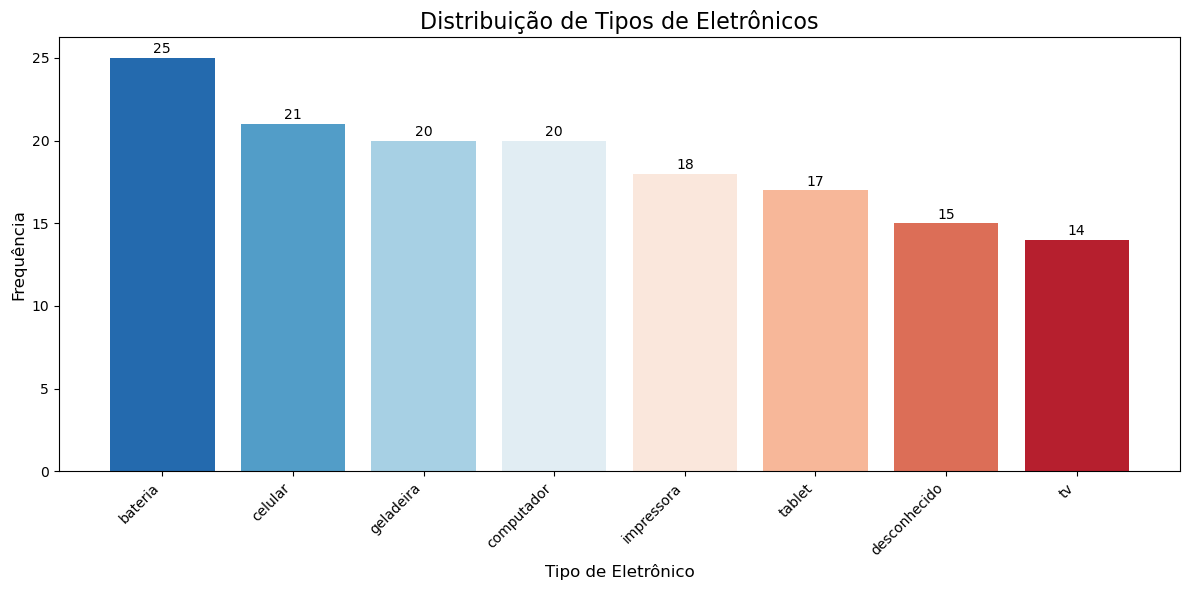

In [5]:
# Distribuição de cada tipo eletrônico
print("=" * 50)
print("FREQUÊNCIA DE TIPO DE ELETRÔNICO")
print("=" * 50)

# Tabela de frequência
freq_tipo = df['Tipo_Eletronico'].value_counts()
freq_tipo_perc = df['Tipo_Eletronico'].value_counts(normalize=True) * 100

tabela_tipo = pd.DataFrame({
    'Frequência': freq_tipo,
    'Percentual (%)': freq_tipo_perc.round(2)
})
print(tabela_tipo)
print("\n")

# Gráfico de barras - Tipo_Eletronico
plt.figure(figsize=(12, 6))
bars = plt.bar(freq_tipo.index, freq_tipo.values, color=sns.color_palette("RdBu_r", len(freq_tipo)))

# Adicionar valores nas barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'{height}', ha='center', va='bottom')

plt.title('Distribuição de Tipos de Eletrônicos', fontsize=16)
plt.xlabel('Tipo de Eletrônico', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.xticks(rotation=45, ha='right')
#plt.grid(axis='y', alpha=0.0)
plt.tight_layout()
plt.show()

FREQUÊNCIA DE ORIGEM
               Frequência  Percentual (%)
Origem                                   
governamental          45           30.00
urbano                 35           23.33
industrial             28           18.67
rural                  27           18.00
desconhecido           15           10.00




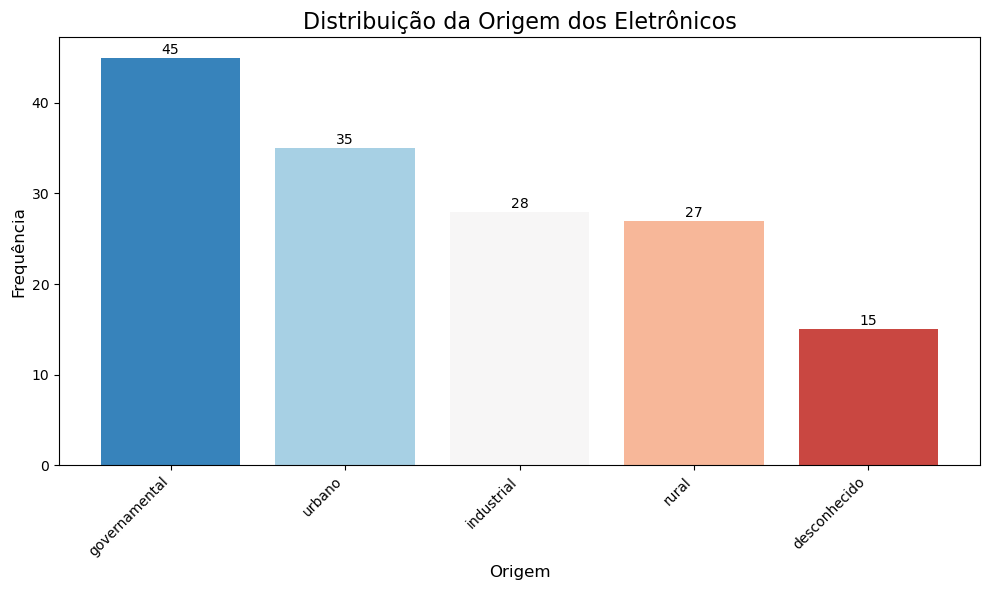

In [6]:
# Origem dos eletronicos
print("=" * 50)
print("FREQUÊNCIA DE ORIGEM")
print("=" * 50)

# Tabela de frequência
freq_origem = df['Origem'].value_counts()
freq_origem_perc = df['Origem'].value_counts(normalize=True) * 100

tabela_origem = pd.DataFrame({
    'Frequência': freq_origem,
    'Percentual (%)': freq_origem_perc.round(2)
})
print(tabela_origem)
print("\n")

# Gráfico de barras - Origem
plt.figure(figsize=(10, 6))
bars = plt.bar(freq_origem.index, freq_origem.values, color=sns.color_palette('RdBu_r', len(freq_origem)))

# Adicionar valores nas barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'{height}', ha='center', va='bottom')

plt.title('Distribuição da Origem dos Eletrônicos', fontsize=16)
plt.xlabel('Origem', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

ANÁLISE CRUZADA - TIPO x ORIGEM
Tabela de Contingência:
Origem           desconhecido  governamental  industrial  rural  urbano
Tipo_Eletronico                                                        
bateria                     1              9           4      6       5
celular                     0              6           4      3       8
computador                  4              5           4      3       4
desconhecido                0              2           3      2       8
geladeira                   3             10           3      3       1
impressora                  5              4           1      5       3
tablet                      1              5           6      2       3
tv                          1              4           3      3       3




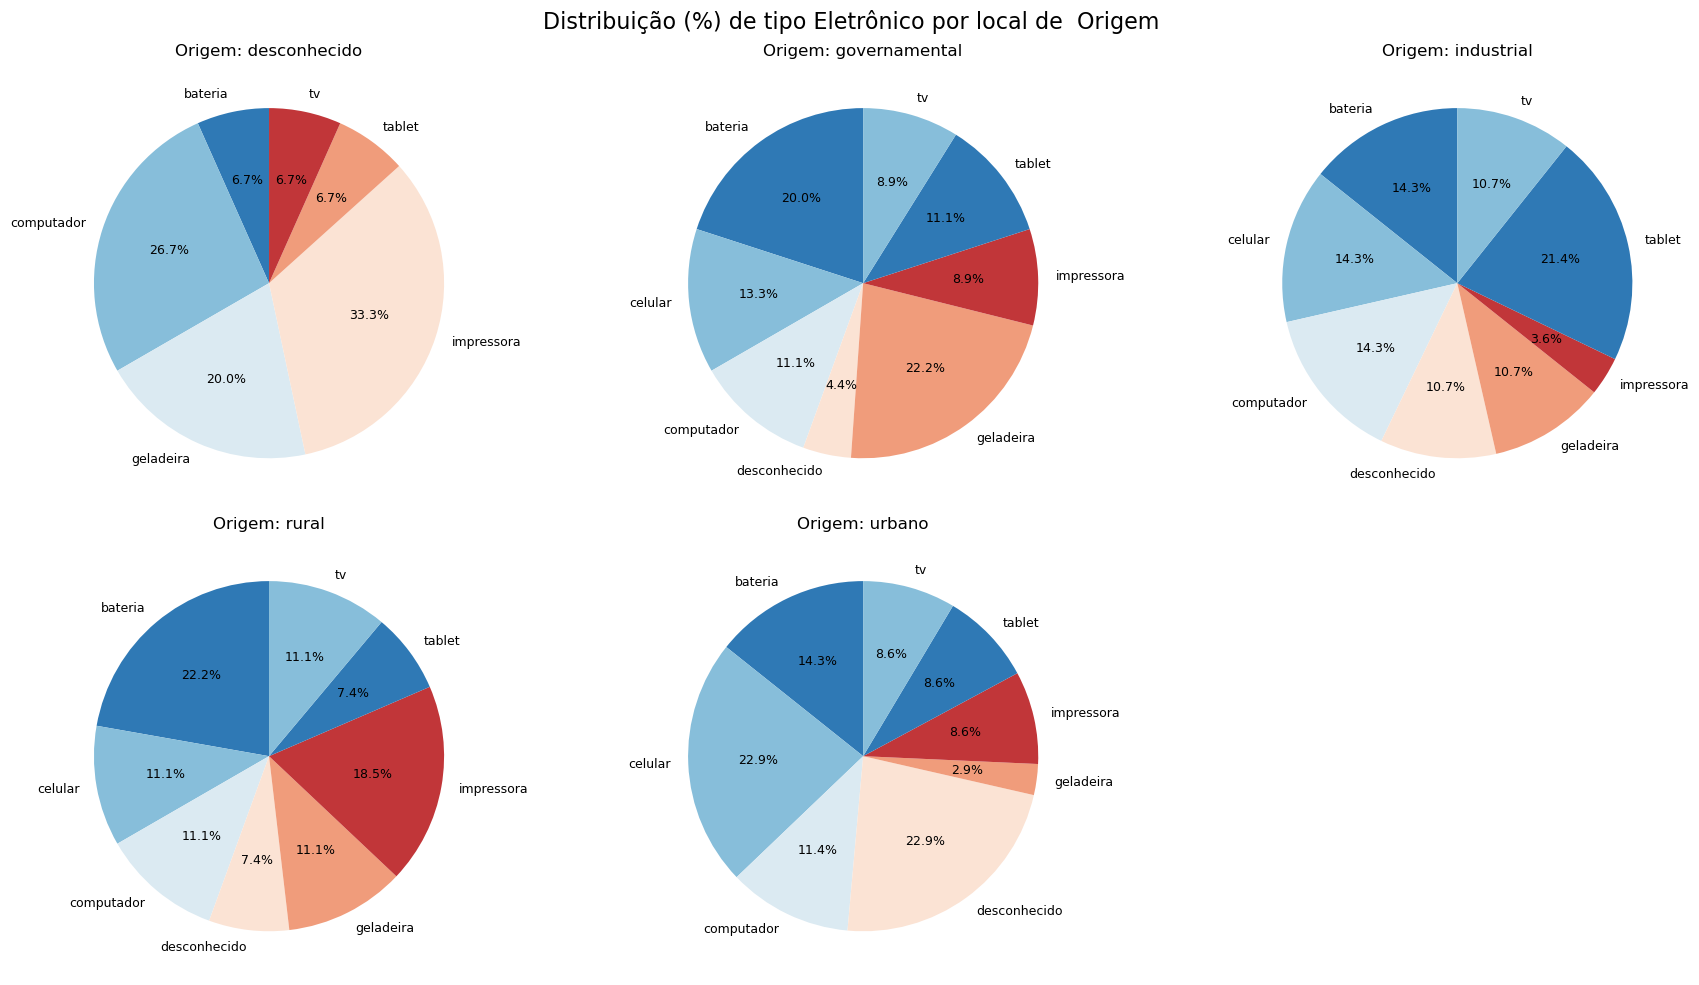

Origem
desconhecido     6
governamental    8
industrial       8
rural            8
urbano           8
Name: Tipo_Eletronico, dtype: int64

In [7]:
# Agrupamento: Tipo x Origem
print("=" * 50)
print("ANÁLISE CRUZADA - TIPO x ORIGEM")
print("=" * 50)

# Cruzamento entre Tipo_Eletronico e Origem
cruzamento = df.groupby(['Tipo_Eletronico', 'Origem']).size().unstack(fill_value=0)
print("Tabela de Contingência:")
print(cruzamento)
print("\n")

#Transpondo a matriz a grupada para plotagem 
pivot=cruzamento.T
n = len(pivot.index)

# Definir grade 2x3 (até 6 subplots)
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
ax = axes.flatten()  
color = sns.color_palette('RdBu_r')

for i, origem in enumerate(pivot.index):
    valores = pivot.loc[origem]
    
    # Remove categorias com valor 0 para evitar poluição
    valores = valores[valores > 0]
    
    wedges, texts, autotexts = ax[i].pie(
        valores,
        labels=valores.index,  # Remove labels dentro da pizza
        autopct='%1.1f%%',
        startangle=90,
        colors=color[:len(valores)],
        textprops={'fontsize': 9}  # Ajusta tamanho do texto
    )
    
    # Título da subplot
    ax[i].set_title(f'Origem: {origem}', fontsize=12)

# Remove eixos extras se sobrar espaço
for j in range(n, 6):
    fig.delaxes(ax[j])

# Título geral
plt.suptitle('Distribuição (%) de tipo Eletrônico por local de  Origem ', fontsize=16)
plt.tight_layout()
plt.show()

df.groupby('Origem')['Tipo_Eletronico'].nunique()


# # Heatmap da análise cruzada
# plt.figure(figsize=(12, 8))
# sns.heatmap(cruzamento, annot=True, fmt='d', cmap='PuBuGn', linewidths=0.5)
# plt.title('Relação entre Tipo de Eletrônico e Origem', fontsize=16, fontweight='bold')
# plt.tight_layout()
# plt.show()


#### Comentários
1. Principais tipos de eletrônicos descartados

Baterias (25 registros, 16,67%) são os itens mais descartados, seguidos de celulares (21, 14%) e computadores (20, 13,33%).
 Esses três somam ~44% de todo o descarte, mostrando onde os esforços de reciclagem e campanhas devem ser priorizados.

2. Origem do descarte

Governamental (45, 30%) é a principal origem, seguido por Urbano (35, 23,33%) e Industrial (32, 21,33%).
 O peso do setor público indica que programas de gestão de resíduos em repartições governamentais podem ter grande impacto imediato.

3. Combinação Tipo × Origem (análise cruzada)

Governamental: concentra especialmente computadores e impressoras.

Urbano: maior diversidade, com celulares e tablets em destaque.

Industrial: predomínio de equipamentos maiores e mais pesados (ex.: geladeiras).
Cada origem tem um “perfil de descarte” diferente, o que sugere a necessidade de estratégias específicas para cada setor.

🎯 RESUMO

O descarte de baterias e celulares é um desafio central pelo volume e risco ambiental.

O setor governamental é o maior responsável individual pelo descarte, sendo um alvo estratégico para políticas públicas.

Os padrões cruzados mostram que não existe solução única: urbano, industrial e governamental têm naturezas diferentes de resíduos.

## 4 – Análise Temporal de Descarte
1. Converta a coluna de data de descarte para o formato datetime;
2. Crie colunas adicionais como mês e ano;
3. Produza gráficos de linha mostrando a evolução mensal do volume de descartes

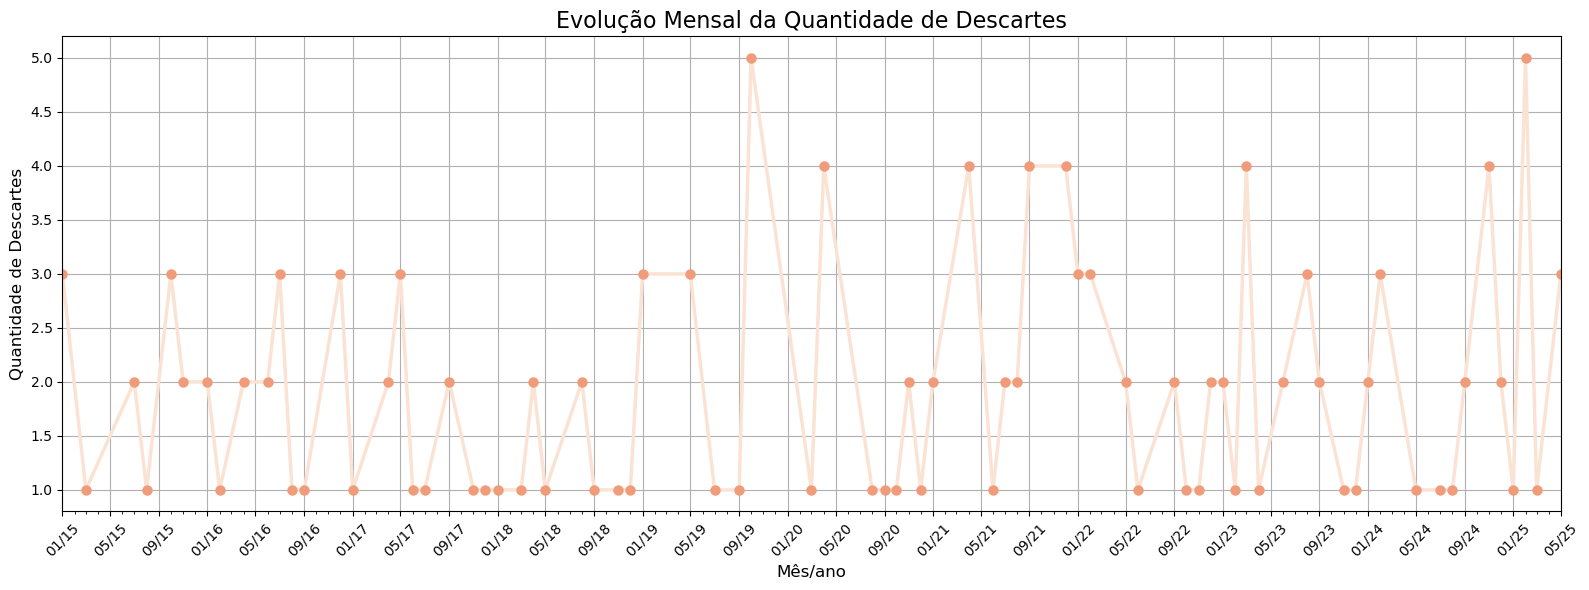

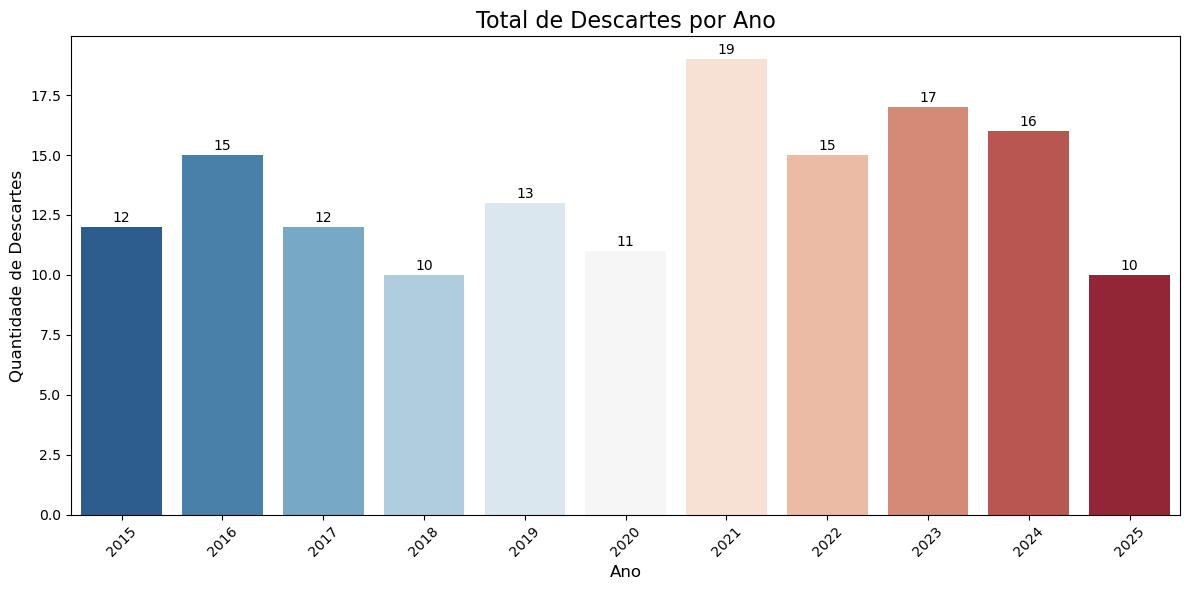

In [8]:
# 1. conversão coluna data para formato datetime
df['Data_Descarte'] = pd.to_datetime(df['Data_Descarte'], errors='coerce')

# 2. criação das colunas adicionais mês e ano
df['Ano'] = df['Data_Descarte'].dt.year
df['Mes'] = df['Data_Descarte'].dt.month

# Agrupamento do descarte 
descartes_mensais = df.groupby([df['Data_Descarte'].dt.to_period('M')]).size().reset_index(name='volume_descartes')
descartes_mensais['Data_Descarte'] = descartes_mensais['Data_Descarte'].dt.to_timestamp()

# Contar o número de descartes por ano
descartes_anuais = df.groupby('Ano').size().reset_index(name='Total_Descartes')

# Calcular a média anual
media_anual = descartes_anuais['Total_Descartes'].mean()

plt.figure(figsize=(16, 6))

# grafico de linha
plt.plot(descartes_mensais['Data_Descarte'].values, 
         descartes_mensais['volume_descartes'].values, 
         marker='o', 
         linestyle='-', 
         color=color[3], 
         linewidth=2.5,
         markersize=6,
         markerfacecolor=color[4],
         markeredgecolor=color[4],
         markeredgewidth=1.5)

# Adicione título e rótulos
plt.title('Evolução Mensal da Quantidade de Descartes', fontsize=16)
plt.xlabel('Mês/ano', fontsize=12)
plt.ylabel('Quantidade de Descartes', fontsize=12)

# Limites baseados nos dados (com margem)
data_min = descartes_mensais['Data_Descarte'].min()
data_max = descartes_mensais['Data_Descarte'].max()

plt.gca().set_xlim(data_min, data_max)

# Formatar o eixo X para mm/YY
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=4))  # Ajuste o intervalo conforme necessário
plt.gca().xaxis.set_minor_locator(mdates.MonthLocator(interval=1))
plt.xticks(rotation=45) 
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotar gráfico de barras(
plt.figure(figsize=(12,6))
sns.barplot(data=descartes_anuais, x='Ano', y='Total_Descartes', palette='RdBu_r')

# Adicionar valores no topo das barras
for index, row in descartes_anuais.iterrows():
    plt.text(index, row['Total_Descartes'] + 0.1, row['Total_Descartes'], ha='center', va='bottom')

plt.title('Total de Descartes por Ano', fontsize=16)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Quantidade de Descartes', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Comentários
**Blocos anuais distintos**
- Bloco 2015–2020:Volume anual relativamente baixo e estável, variando entre 10 e 15 descartes por ano.
- Bloco 2021–2024:Volume anual mais alto e variável, entre 15 e 19 descartes por ano.
Sugere um aumento na atividade de descarte ou na eficácia do registro, possivelmente relacionado a campanhas de conscientização, programas governamentais ou maior acesso a pontos de coleta.

Ano de 2025:
Até o momento, registra 10 descartes, mas não é possível ainda classificar 2025 dentro de um padrão, já que o ano não está completo e os dados parciais podem não refletir o comportamento total anual.



## 5 – Agregação por Município
Utilize groupby para agregar os dados por município, calculando:
1. Total de resíduos descartados(quantos resíduos foram descartados);
2. Média de peso dos eletrônicos;
3. Proporção de destinos formais ('aterro controlado', 'cooperativa', 'reciclagem formal') em relação aos informais ('lixão',
       'Desconhecido', 'rio');
4. Apresente os resultados em uma tabela ordenada e em gráfico de barras horizontais.



In [9]:
# Agrupamento por municipio e calculando total de residuos e média de peso
agrupamento_municipio = df.groupby('Municipio').agg(
    Total_Residuos=('ID_Registro', 'count'),  # Quantidade de resíduos descartados
    Media_Peso=('Peso_kg', 'mean')          # Média de peso dos eletrônicos
).reset_index()

# definição dos destinos
destinos_formais = ['aterro controlado', 'cooperativa', 'reciclagem formal']
destinos_informais = ['lixão', 'desconhecido', 'rio']

# Agrupar muncipios e destino do lixo 
destinos_counts = df.groupby(['Municipio', 'Destino_Final']).size().unstack(fill_value=0)

# somar totais de formais e informais
destinos_counts['Formais'] = destinos_counts[destinos_formais].sum(axis=1)
destinos_counts['Informais'] = destinos_counts[destinos_informais].sum(axis=1)

# Calcular proporção relativa ( formal/total) 
#ex barcarena=3/0 -> infinito. 
destinos_counts['Proporcao_Formais'] = destinos_counts['Formais'] / (destinos_counts['Formais'] + destinos_counts['Informais'])
#display(destinos_counts)

# agrupamento completo
agrupamento_completo = agrupamento_municipio.merge(
    destinos_counts[['Formais', 'Informais', 'Proporcao_Formais']],
    left_on='Municipio', right_index=True, how='left'
)
agrupamento_sort_proporcao=agrupamento_completo.sort_values('Total_Residuos', ascending=False)

print(f"\n{'='*105}")
print("📊 TABELA- Descartes por municipio- Total_residuos ⬆️ ")
print(f"{'='*105}")
print(agrupamento_sort_proporcao.to_markdown())

print("=" * 105)
print(f"{'ESTATÍSTICAS GERAIS':^105}")
print("=" * 105)
print(f"{'Total de municípios:':<30} {len(agrupamento_sort_proporcao):>15}")
print(f"{'Total geral de resíduos:':<30} {agrupamento_completo['Total_Residuos'].sum():>15,}")
print(f"{'Peso Total dos resíduos:':<30} {df['Peso_kg'].sum():>15.2f}")
print(f"{'Média geral de peso:':<30} {agrupamento_completo['Media_Peso'].mean():>15,.2f}")
print(f"{'Proporção de destinos formais:':<30} {agrupamento_completo['Proporcao_Formais'].mean():>15.1%}")
print("=" * 105)


📊 TABELA- Descartes por municipio- Total_residuos ⬆️ 
|    | Municipio      |   Total_Residuos |   Media_Peso |   Formais |   Informais |   Proporcao_Formais |
|---:|:---------------|-----------------:|-------------:|----------:|------------:|--------------------:|
|  5 | Belém          |               24 |     22.5492  |         8 |          16 |            0.333333 |
|  3 | Ananindeua     |               17 |     25.5576  |         6 |          11 |            0.352941 |
| 22 | Santarém       |               16 |     28.7275  |         7 |           9 |            0.4375   |
| 11 | Castanhal      |               12 |     26.8683  |         8 |           4 |            0.666667 |
| 15 | Marabá         |               12 |     26.7708  |         7 |           5 |            0.583333 |
|  8 | Cametá         |                8 |     28.0938  |         4 |           4 |            0.5      |
| 20 | Parauapebas    |                7 |     23.5971  |         4 |           3 |            0.

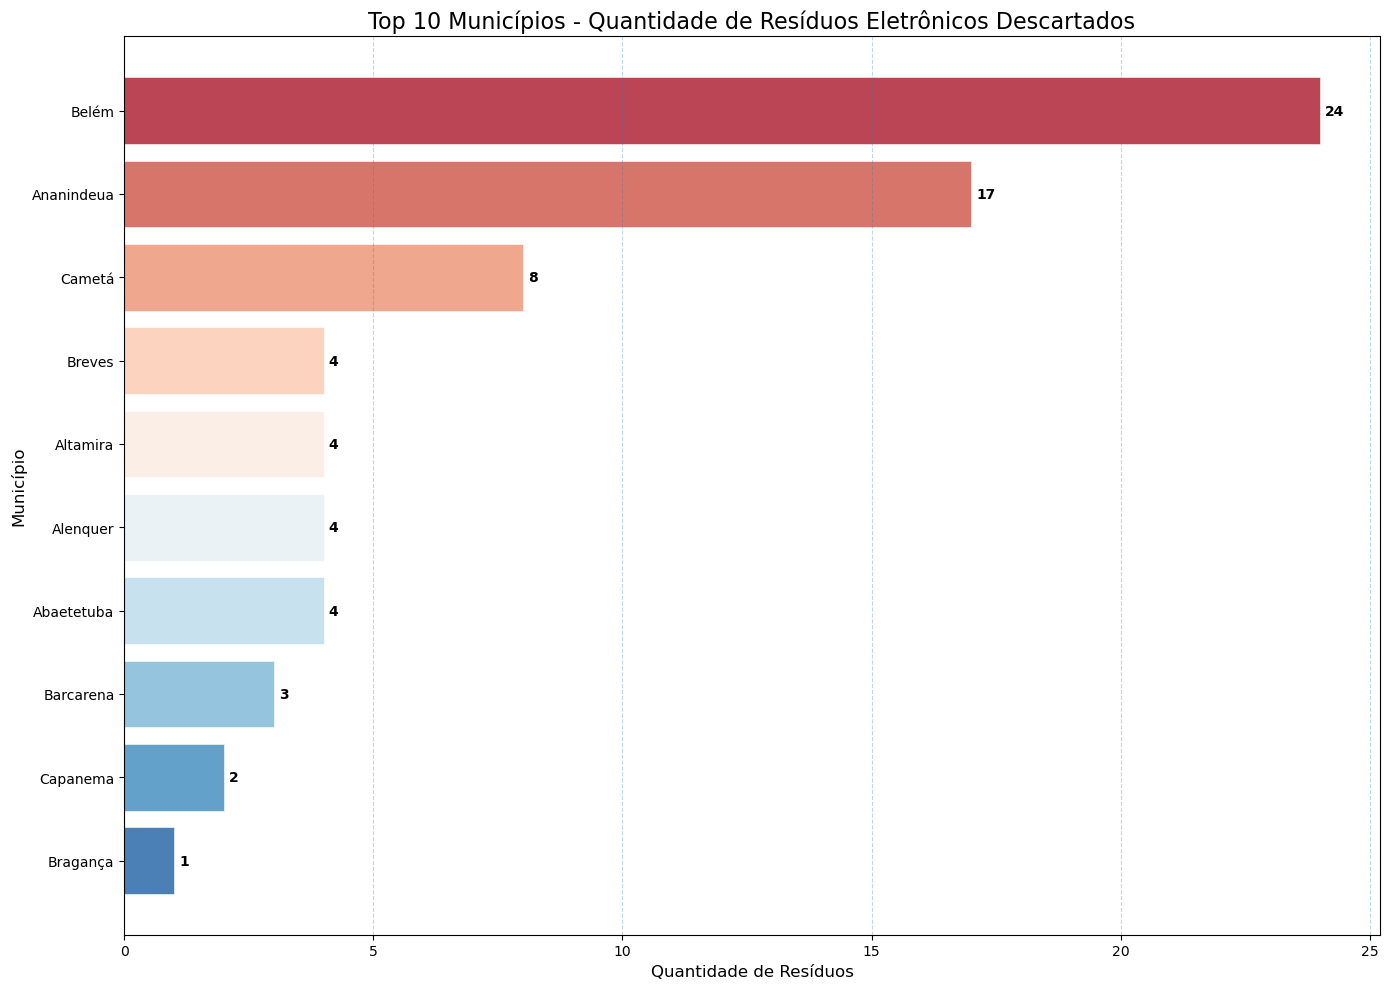

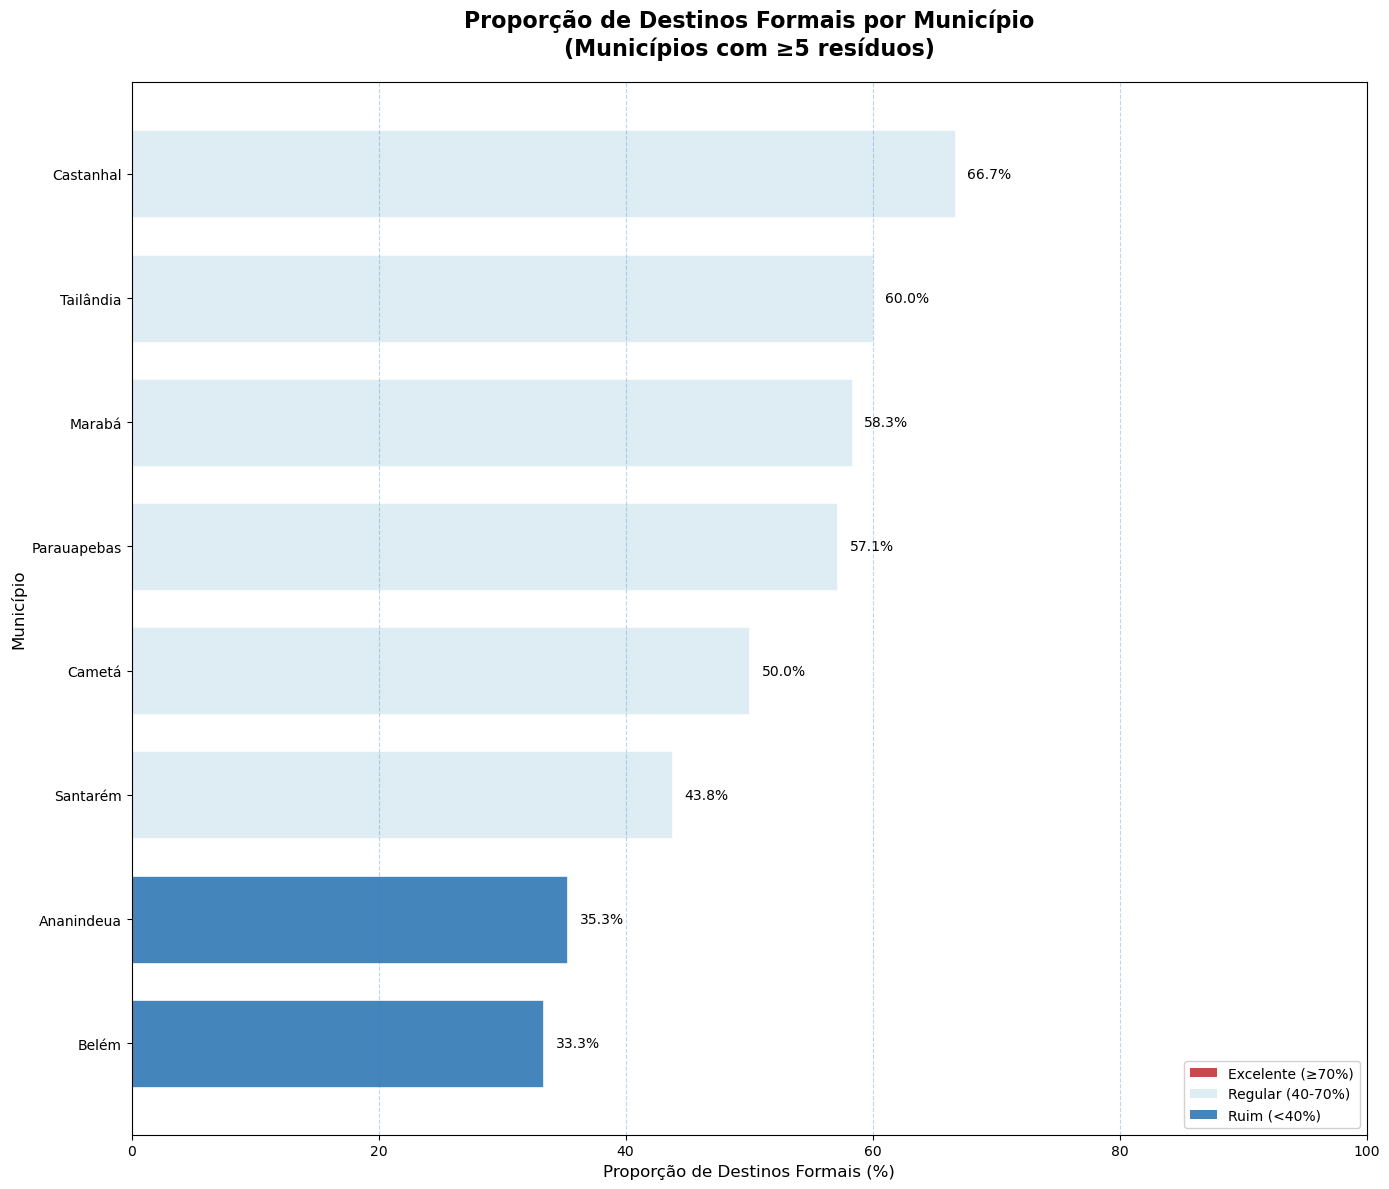

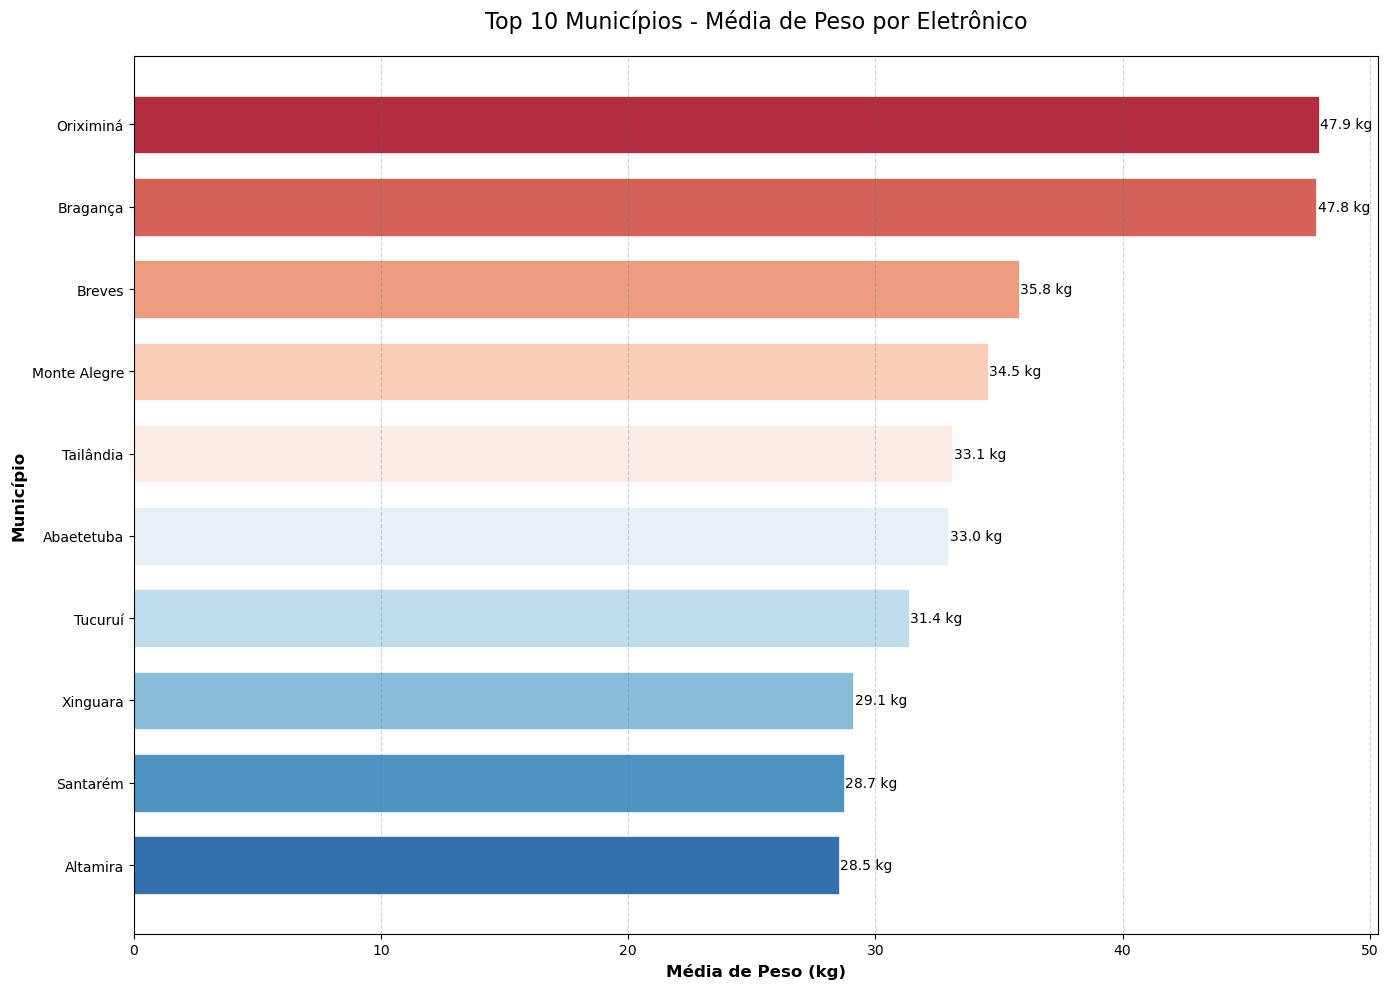

In [10]:
# Definir a paleta de cores
color = sns.color_palette('RdBu_r')
color_verde = color[5]    # Verde mais escuro da paleta
color_medio = color[2]    # Verde médio
color_claro = color[0]    # Verde mais claro

# Quantidade de resíduos por município (top 10)
top_10_residuos = agrupamento_completo.head(10).sort_values('Total_Residuos', ascending=True)
gradient_colors = sns.color_palette('RdBu_r', n_colors=len(top_10_residuos))

plt.figure(figsize=(14, 10))
bars = plt.barh(top_10_residuos['Municipio'], top_10_residuos['Total_Residuos'], 
                 color=gradient_colors, alpha=0.8, edgecolor='white', linewidth=0.5)

plt.title('Top 10 Municípios - Quantidade de Resíduos Eletrônicos Descartados', 
          fontsize=16)
plt.xlabel('Quantidade de Resíduos', fontsize=12)
plt.ylabel('Município', fontsize=12)
plt.grid(axis='x', alpha=0.3, linestyle='--', color=color_claro)

# Adicionar valores nas barras
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.1, bar.get_y() + bar.get_height()/2, 
             f'{width:.0f}', ha='left', va='center', 
             fontweight='bold', fontsize=10)

plt.tight_layout()
plt.show()

# GRÁFICO 2: Proporção de destinos formais
plt.figure(figsize=(14, 12))
municipios_significativos = agrupamento_completo[agrupamento_completo['Total_Residuos'] >= 5]
municipios_ordenados = municipios_significativos.sort_values('Proporcao_Formais', ascending=True)

# Definir escala de cor baseada na paleta PuBuGn
colors = []
for proporcao in municipios_ordenados['Proporcao_Formais']:
    if proporcao >= 0.7:
        colors.append(color[5])       # Excelente (>70%) - Verde escuro
    elif proporcao >= 0.4:
        colors.append(color[2])       # Regular (40-70%) - Verde médio
    else:
        colors.append(color[0])       # Ruim (<40%) - Verde claro

bars = plt.barh(municipios_ordenados['Municipio'], municipios_ordenados['Proporcao_Formais'] * 100, 
                color=colors, edgecolor='white', alpha=0.9, height=0.7, linewidth=0.5)

plt.title('Proporção de Destinos Formais por Município\n(Municípios com ≥5 resíduos)', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Proporção de Destinos Formais (%)', fontsize=12)
plt.ylabel('Município', fontsize=12)
plt.grid(axis='x', alpha=0.3, linestyle='--', color=color_claro)
plt.xlim(0, 100)

# Adicionar valores nas barras
for bar, proporcao in zip(bars, municipios_ordenados['Proporcao_Formais']):
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height()/2, 
             f'{width:.1f}%', ha='left', va='center',fontsize=10)

# Adicionar legenda de cores
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor=color[5], label='Excelente (≥70%)', alpha=0.9),
    Patch(facecolor=color[2], label='Regular (40-70%)', alpha=0.9),
    Patch(facecolor=color[0], label='Ruim (<40%)', alpha=0.9)
]
plt.legend(handles=legend_elements, loc='lower right', framealpha=0.9)

plt.tight_layout()
plt.show()

# Média de peso por município (top 10) - CORRIGIDO
plt.figure(figsize=(14, 10))
top_10_peso = agrupamento_completo.nlargest(10, 'Media_Peso').sort_values('Media_Peso', ascending=True)

# CORREÇÃO: Usar uma paleta com número suficiente de cores
gradient_colors = sns.color_palette('RdBu_r', n_colors=len(top_10_peso))

bars = plt.barh(top_10_peso['Municipio'], top_10_peso['Media_Peso'], 
                color=gradient_colors, alpha=0.9, edgecolor='white', 
                linewidth=0.5, height=0.7)

plt.title('Top 10 Municípios - Média de Peso por Eletrônico', 
          fontsize=16, pad=20)
plt.xlabel('Média de Peso (kg)', fontsize=12, fontweight='bold')
plt.ylabel('Município', fontsize=12, fontweight='bold')
plt.grid(axis='x', alpha=0.3, linestyle='--', color=color_claro)

# Adicionar valores nas barras
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.05, bar.get_y() + bar.get_height()/2, 
             f'{width:.1f} kg', ha='left', va='center'
             , fontsize=10)

plt.tight_layout()
plt.show()


### Comentários

 1. **Concentração de Resíduos**
- A geração de lixo eletrônico não é uniforme entre os municípios.  
- **Belém, Ananindeua e Santarém** concentram o maior número de resíduos, juntos representando mais de 40% do total registrado (150 resíduos).  
- Municípios menores ou mais afastados, como **Bragança, Oriximiná e Xinguara**, registram apenas 1-2 descartes, evidenciando desigualdade na produção e registro de resíduos.

 2. **Proporção de Destinos Formais**
- A média geral de destinos formais é **52,6%**, indicando que quase metade dos resíduos ainda vai para destinos informais.  
- Municípios como **Castanhal, Tailândia e Marabá** apresentam boa gestão, com mais de 58% de resíduos destinados a locais formais.  
- Já grandes centros urbanos, como **Belém (33,3%)** e **Ananindeua (35,3%)**, têm grande quantidade de resíduos indo para lixões ou rios, mostrando desafios logísticos e comportamentais.

 3. **Peso Médio dos Resíduos**
- A média de peso geral é de **25,25 kg por equipamento**, com municípios como **Breves (35,8 kg), Tailândia (33,1 kg) e Abaetetuba (32,9 kg)** apresentando eletrônicos mais pesados.  
- Isso sugere que o impacto ambiental pode ser maior nesses locais, dado que equipamentos mais pesados geralmente contêm maior quantidade de metais pesados.

 4. **Padrões Gerais**
- Há uma **disparidade clara entre quantidade de resíduos e qualidade do descarte formal**: municípios com mais resíduos nem sempre têm maior proporção de destinos corretos.  
- Municípios menores podem ter proporção formal elevada (ex.: Dom Eliseu e Barcarena com 100%), mas contribuem pouco para o volume total.  
- Municípios maiores apresentam grande volume de resíduos, mas ainda dependem de melhorias na destinação correta.

 5. **Implicações**
- A análise evidencia a necessidade de **estratégias diferenciadas por município**:  
  - Grandes centros precisam de programas de educação ambiental e maior infraestrutura de reciclagem.  
  - Municípios menores, mesmo com boa proporção de destinos formais, podem se beneficiar de incentivo à ampliação do registro de descartes.  
- A combinação de **quantidade, peso e proporção de formalidade** ajuda a priorizar ações para reduzir o impacto do lixo eletrônico na Amazônia.

## 6-Cruzamento entre Tipo de Eletrônico e Destino
1. Crie uma tabela cruzada (crosstab ou pivot_table) relacionando o tipo de eletrônico com seu destino.
2.  Visualize os resultados em um heatmap (Seaborn), destacando quais combinações são mais críticas


📊 TABELA- Tipo Eletronico x Destino Final 
| Tipo_Eletronico   |   aterro controlado |   cooperativa |   desconhecido |   lixão |   reciclagem formal |   rio |   Total |
|:------------------|--------------------:|--------------:|---------------:|--------:|--------------------:|------:|--------:|
| bateria           |                   5 |             2 |              2 |       7 |                   5 |     4 |      25 |
| celular           |                   2 |             3 |              3 |       3 |                   3 |     7 |      21 |
| computador        |                   4 |             3 |              2 |       5 |                   3 |     3 |      20 |
| desconhecido      |                   1 |             2 |              2 |       6 |                   2 |     2 |      15 |
| geladeira         |                   4 |             5 |              0 |       5 |                   3 |     3 |      20 |
| impressora        |                   4 |             4 |        

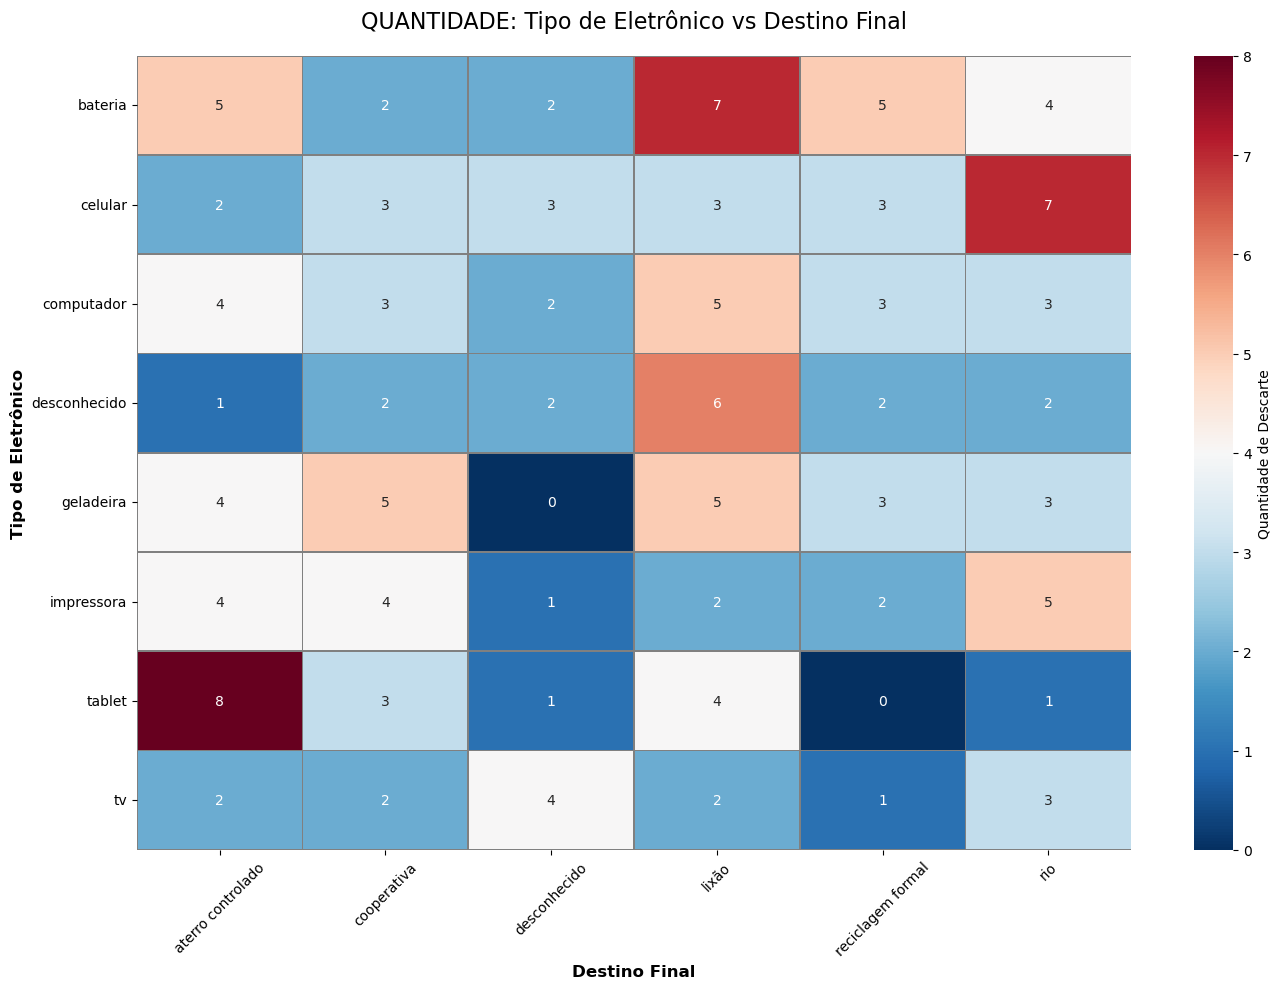


⚠️  TABELA- Risco Normalizado 
| Tipo_Eletronico   |   aterro controlado |   cooperativa |   desconhecido |   lixão |   reciclagem formal |   rio |
|:------------------|--------------------:|--------------:|---------------:|--------:|--------------------:|------:|
| bateria           |                7.25 |          2.31 |           2.32 |    8.41 |                8.82 |  7.48 |
| celular           |                3.51 |          2.48 |           4.18 |    6.00 |                4.08 |  7.09 |
| computador        |                3.97 |          1.40 |           2.00 |    4.86 |                5.74 |  5.88 |
| desconhecido      |                1.47 |          3.05 |           2.45 |    7.17 |                3.95 |  3.13 |
| geladeira         |                6.97 |          4.64 |           0.00 |    7.16 |                1.84 |  1.32 |
| impressora        |                7.75 |          6.55 |           0.65 |    2.57 |                2.66 |  8.23 |
| tablet            |           

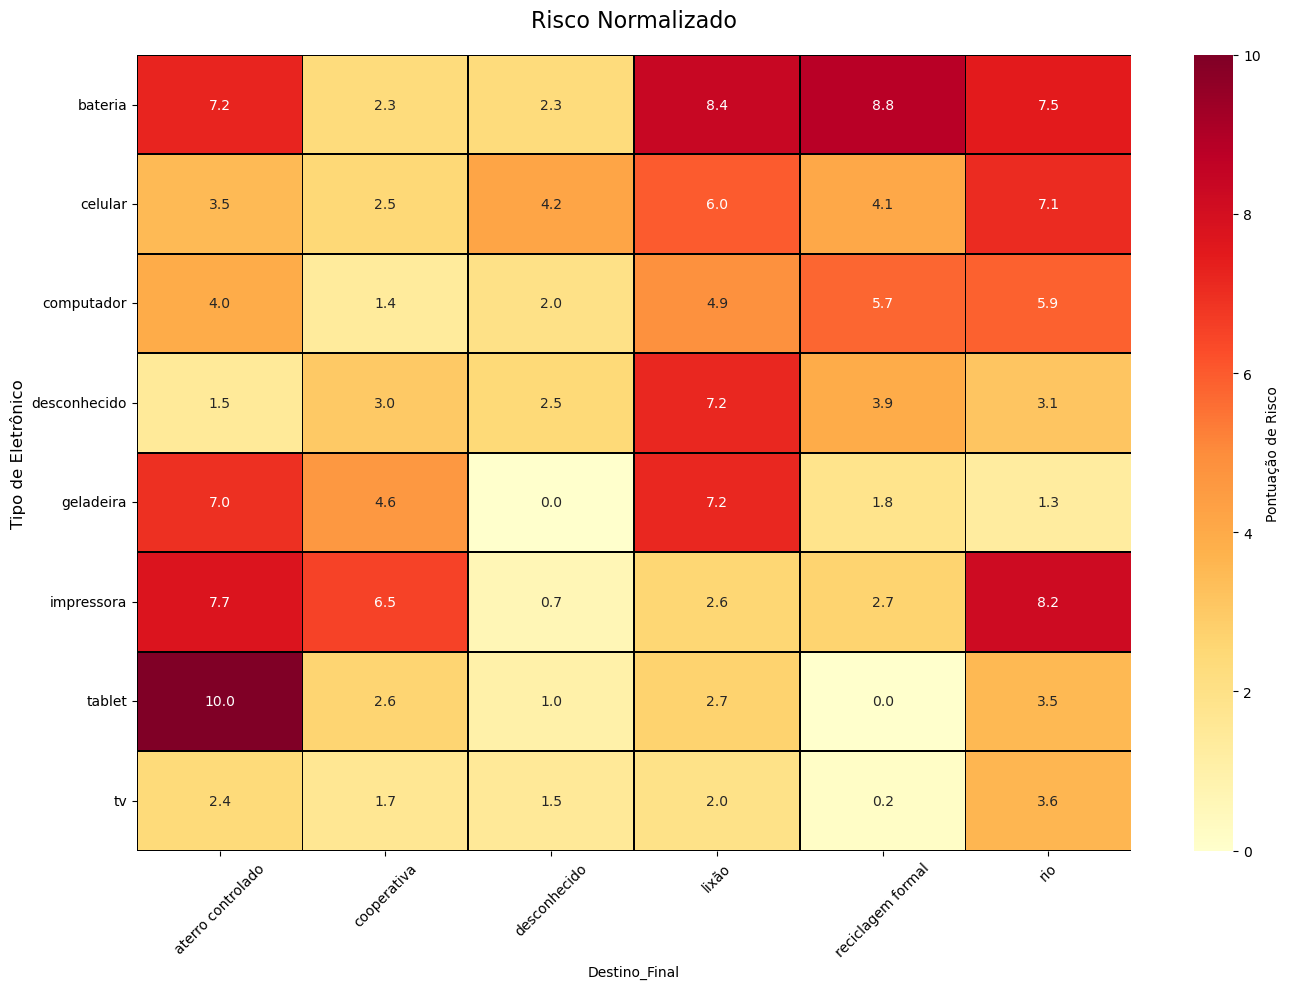

In [11]:
#tabela cruzada tipo eletronico - destino final
tabela_cruzada = pd.crosstab(
    df['Tipo_Eletronico'],
    df['Destino_Final'],
    margins=True,
    margins_name='Total'
)

print(f"\n{'='*126}")
print("📊 TABELA- Tipo Eletronico x Destino Final ")
print(f"{'='*126}")
print(tabela_cruzada.to_markdown())
print('\n')

# Tipo de eletronico x Destino final
plt.figure(figsize=(14, 10))
heatmap1 = sns.heatmap(
    tabela_cruzada.iloc[:-1, :-1],
    annot=True,
    fmt='d',
    cmap='RdBu_r',
    linewidths=0.5,
    linecolor='gray',
    cbar_kws={'label': 'Quantidade de Descarte'},
    square=False
)        
plt.title('QUANTIDADE: Tipo de Eletrônico vs Destino Final',fontsize=16, pad=20)
plt.xlabel('Destino Final', fontsize=12, fontweight='bold')
plt.ylabel('Tipo de Eletrônico', fontsize=12, fontweight='bold')
plt.tick_params(axis='x', rotation=45)
plt.tick_params(axis='y', rotation=0)
plt.tight_layout()
plt.show()


#avaliação de zonas críticas: definição de valores
mapeamento_toxicidade = {
    'baixo': 1,
    'médio': 2, 
    'alto': 3,
    'crítico': 4
}
df['Nivel_Toxico_Num'] = df['Nivel_Toxico'].map(mapeamento_toxicidade)

# Avalia o risco de acordo com numero de itens e sua toxicidade.
# risco=quantidade[unit] X peso[kg] x nivel_toxico. ( item toxico mais pesado é um complicador maior ao meio ambiente)
df['risco'] = df['Peso_kg']*df['Nivel_Toxico_Num']
# Pivot para risco acumulado
tb_risco = pd.pivot_table(
    df,
    values='risco',
    index='Tipo_Eletronico',
    columns='Destino_Final',
    aggfunc='sum',
    fill_value=0
)

#normalizando e pontuando de 0-10
tb_risco_normalizado = (
    (tb_risco - tb_risco.min().min()) /
    (tb_risco.max().max() - tb_risco.min().min())*10
)


print(f"\n{'='*126}")
print("⚠️  TABELA- Risco Normalizado ")
print(f"{'='*126}")
print(tb_risco_normalizado.to_markdown(floatfmt=".2f"))
print('\n')


plt.figure(figsize=(14, 10))
sns.heatmap(
    tb_risco_normalizado,
    cmap="YlOrRd",
    linewidths=0.5,
    linecolor='black',
    annot=True,
    fmt=".1f",
    cbar_kws={'label': 'Pontuação de Risco'}
)
plt.title("Risco Normalizado",fontsize=16, pad=20)
plt.ylabel("Tipo de Eletrônico")
plt.ylabel('Tipo de Eletrônico', fontsize=12)
plt.tick_params(axis='x', rotation=45)
plt.tick_params(axis='y', rotation=0)
plt.tight_layout()
plt.show()

### Comentários

* Distribuição dos Descartes: O cruzamento entre tipo de eletrônico e destino final evidencia padrões distintos de descarte. Alguns tipos apresentam maior concentração em destinos informais, o que sugere fragilidades no sistema de coleta e reciclagem formal.Outros tipos se distribuem de forma mais equilibrada, indicando que o canal de descarte pode variar conforme o equipamento. ex: Baterias: muitas vezes são descartadas junto com o lixo doméstico ou em caçambas de rua, devido à ausência de pontos de coleta acessíveis. Isso eleva o risco ambiental, pois o nível tóxico é alto (chumbo, cádmio, lítio).
* Itens volumosos e críticos concentram maior risco: Mesmo que a frequência de descarte não seja tão alta, quando esses itens aparecem (ex.: geladeira, impressoras pesadas), o risco acumulado dispara.
* Destinos informais recebem riscos desproporcionais: Quando há descarte irregular, o risco associado tende a ser muito mais relevante ambientalmente do que o simples número de itens sugere.
* Risco relativo entre categorias: Dispositivos leves mas tóxicos (ex.: baterias) podem apresentar risco similar ou até superior a itens volumosos de baixa toxicidade, reforçando que peso não é o único fator crítico.


## 7-Impacto do Peso dos Resíduos no Meio Ambiente
1. Utilize describe()
2. métodos de visualização (boxplot e histplot) para analisar a distribuição do peso dos resíduos eletrônicos.
3. Identifique outliers e discuta possíveis explicações para sua ocorrência.
4. faça uma comparação da média e do desvio padrão de peso entre descartes destinados formalmente e informalmente, apresentando os resultados em gráfico de violino.


In [12]:
# 1. ANÁLISE DESCRITIVA DA DISTRIBUIÇÃO DE PESO
print("📊 ANÁLISE DESCRITIVA - PESO DOS RESÍDUOS ELETRÔNICOS (kg)")
print("=" * 60)
print(df['Peso_kg'].describe().round(2))
print("=" * 60)


# # 2. IDENTIFICAÇÃO DE OUTLIERS
Q1 = df['Peso_kg'].quantile(0.25)
Q3 = df['Peso_kg'].quantile(0.75)
IQR = Q3 - Q1
limite_superior = Q3 + 1.5 * IQR
limite_inferior = Q1 - 1.5 * IQR

outliers = df[(df['Peso_kg'] > limite_superior) | (df['Peso_kg'] < limite_inferior)]
print(f"\n🔍 DETECÇÃO DE OUTLIERS:")
print(f"• Limite inferior: {limite_inferior:.2f} kg")
print(f"• Limite superior: {limite_superior:.2f} kg")
print(f"• Número de outliers: {len(outliers)} ({len(outliers)/len(df)*100:.1f}% dos dados)")
print(f"• Peso máximo encontrado: {df['Peso_kg'].max():.2f} kg")
print(f"• Peso mínimo encontrado: {df['Peso_kg'].min():.2f} kg")

📊 ANÁLISE DESCRITIVA - PESO DOS RESÍDUOS ELETRÔNICOS (kg)
count    150.00
mean      25.38
std       13.20
min        1.71
25%       16.29
50%       24.18
75%       35.31
max       49.80
Name: Peso_kg, dtype: float64

🔍 DETECÇÃO DE OUTLIERS:
• Limite inferior: -12.23 kg
• Limite superior: 63.83 kg
• Número de outliers: 0 (0.0% dos dados)
• Peso máximo encontrado: 49.80 kg
• Peso mínimo encontrado: 1.71 kg


/home/akel/anaconda2025/envs/data_science/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


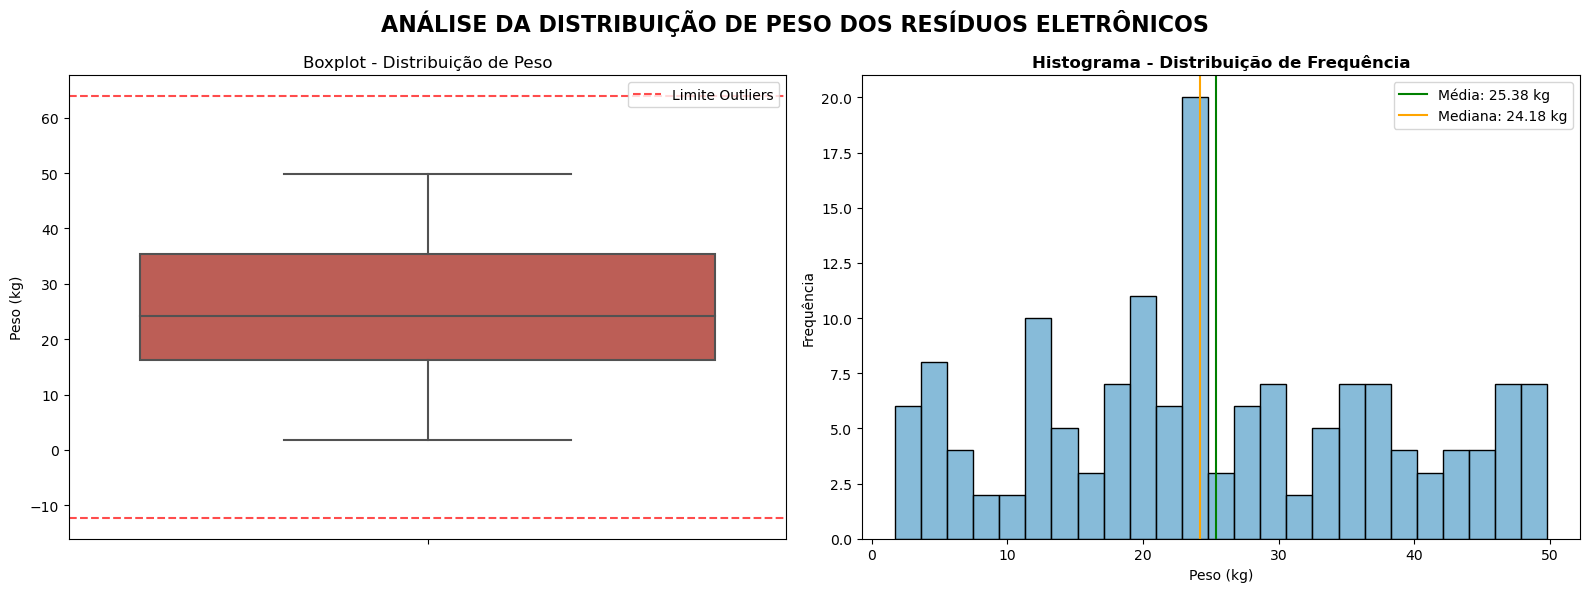

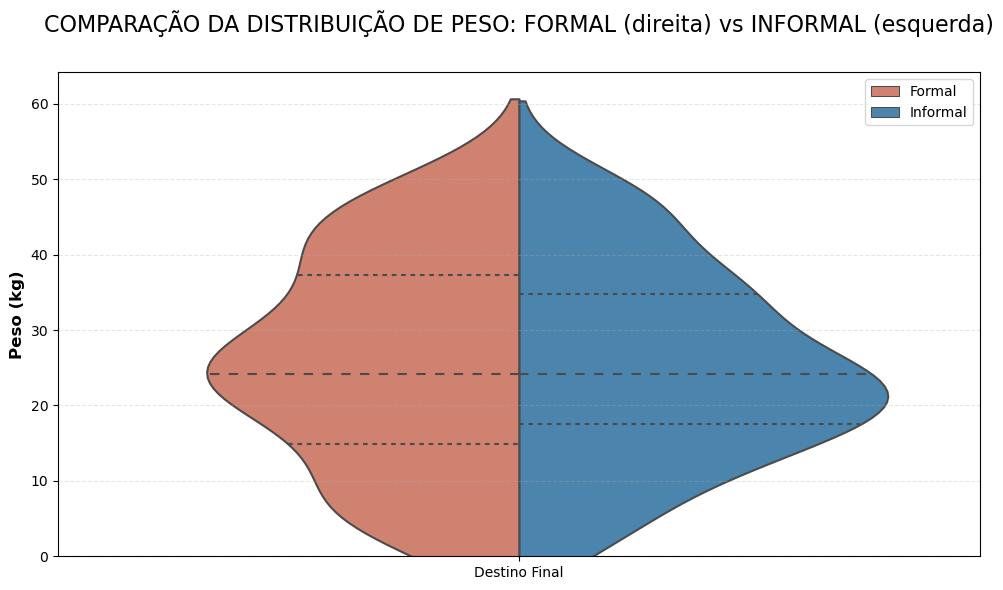

📊 ESTATÍSTICAS DESCRITIVAS - PESO POR CATEGORIA DE DESTINO
| Categoria   |   mean |   std |   count |
|:------------|-------:|------:|--------:|
| Formal      |  25.59 | 13.87 |   73.00 |
| Informal    |  25.18 | 12.63 |   77.00 |




In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('ANÁLISE DA DISTRIBUIÇÃO DE PESO DOS RESÍDUOS ELETRÔNICOS', 
             fontsize=16, fontweight='bold')

cores = sns.color_palette("RdBu_r",16)

# Boxplot com incremento dos limites para outliers
sns.boxplot(y=df['Peso_kg'], ax=ax1, color=cores[13])
ax1.set_title('Boxplot - Distribuição de Peso')
ax1.set_ylabel('Peso (kg)')
ax1.axhline(limite_superior, color='red', linestyle='--', alpha=0.7, label='Limite Outliers')
ax1.axhline(limite_inferior, color='red', linestyle='--', alpha=0.7)
ax1.legend()

# Histograma 
sns.histplot(data=df, x='Peso_kg', bins=25, ax=ax2, color=cores[3])  
ax2.set_title('Histograma - Distribuição de Frequência', fontweight='bold')
ax2.set_xlabel('Peso (kg)')
ax2.set_ylabel('Frequência')
ax2.axvline(df['Peso_kg'].mean(), color='green', linestyle='-', label=f'Média: {df["Peso_kg"].mean():.2f} kg')
ax2.axvline(df['Peso_kg'].median(), color='orange', linestyle='-', label=f'Mediana: {df["Peso_kg"].median():.2f} kg')
ax2.legend()

plt.tight_layout()
plt.show()

# Definição dos destinos
destinos_formais = ['aterro controlado', 'cooperativa', 'reciclagem formal']
destinos_informais = ['lixão', 'desconhecido', 'rio']

# Filtrar os dados para separar os grupos
df_formal = df[df['Destino_Final'].isin(destinos_formais)].copy()
df_informal = df[df['Destino_Final'].isin(destinos_informais)].copy()

# Adicionar coluna de categoria
df_formal['Categoria'] = 'Formal'
df_informal['Categoria'] = 'Informal'

# Combinar os dados filtrados
df_comparacao = pd.concat([df_formal, df_informal])

# # Calcular estatísticas descritivas
# estatisticas = df_comparacao.groupby('Categoria')['Peso_kg'].agg(['mean', 'std', 'count'])
# print("📊 ESTATÍSTICAS DESCRITIVAS - PESO POR CATEGORIA DE DESTINO")
# print("=" * 60)
# print(estatisticas.to_markdown(floatfmt=".2f"))
# print("\n")
df_comparacao['Destino'] = 'Destino Final'
# Criar gráfico de violino com metade esquerda/direita
plt.figure(figsize=(10, 6))
sns.violinplot(
    data=df_comparacao,
    x='Destino',       
    y='Peso_kg',
    hue='Categoria',    
    split=True,         
    palette={'Formal': cores[12], 'Informal': cores[2]},
    inner='quartile',
    alpha=0.8
)


# Personalização
plt.title('COMPARAÇÃO DA DISTRIBUIÇÃO DE PESO: FORMAL (direita) vs INFORMAL (esquerda)\n', 
          fontsize=16, pad=10)
plt.xlabel('')
plt.ylabel('Peso (kg)', fontsize=12, fontweight='bold')
plt.ylim(bottom=0)
plt.legend(loc='upper right')
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

# Calcular estatísticas descritivas
estatisticas = df_comparacao.groupby('Categoria')['Peso_kg'].agg(['mean', 'std', 'count'])
print("📊 ESTATÍSTICAS DESCRITIVAS - PESO POR CATEGORIA DE DESTINO")
print("=" * 60)
print(estatisticas.to_markdown(floatfmt=".2f"))
print("\n")

### Comentários

A análise do peso dos resíduos eletrônicos coletados na região revelou informações importantes sobre a distribuição e o perfil dos equipamentos descartados.  

* Distribuição de Peso
Os resíduos apresentam um peso médio de aproximadamente 25,38 kg, com desvio padrão de 13,20 kg, indicando uma variabilidade moderada entre os equipamentos. O intervalo observado vai de 1,71 kg até 49,80 kg. A detecção de outliers, realizada com base no critério do IQR (1,5×intervalo interquartílico), não identificou valores extremos, o que indica **estabilidade na distribuição de peso** dos resíduos analisados.

O histograma e o boxplot confirmam essa uniformidade, mostrando que a maioria dos resíduos se concentra entre 16 e 35 kg, com poucos equipamentos muito leves ou muito pesados. Esta estabilidade sugere que, independentemente do tipo de eletrônico, o peso dos equipamentos descartados tende a se manter dentro de uma faixa previsível.

* Comparação entre Destinos Formais e Informais
Ao separar os resíduos por destino, foi possível comparar os descartes formais (aterro controlado, cooperativa, reciclagem formal) e informais (lixão, rio, desconhecido). A análise mostrou que a **média de peso dos resíduos formais é de 25,59 kg**, enquanto a média dos resíduos informais é de **25,18 kg**, com desvios padrão semelhantes (13,87 kg e 12,63 kg, respectivamente).  

Essa diferença mínima evidencia que **o destino final não altera significativamente o perfil de peso dos resíduos**. Ou seja, a categoria de destino — formal ou informal — não é determinante para o peso dos equipamentos descartados. O fator mais relevante parece ser o tipo de eletrônico em si, refletindo características físicas e composição dos aparelhos.

* Distribuição Detalhada
A análise por intervalos de peso (bins) mostra que a maior concentração de resíduos ocorre entre 22,87 kg e 24,79 kg, com 20 observações, seguida por intervalos entre 19,02 kg e 22,87 kg. Equipamentos muito leves ou muito pesados aparecem em menor número, reforçando a constância na distribuição de peso e a ausência de outliers significativos.

* Conclusão
A atividade evidencia que, no contexto amazônico, **o peso dos resíduos eletrônicos é relativamente estável**, sem registros de valores extremos. Além disso, **não há diferença relevante entre descartes formais e informais**, sugerindo que políticas de manejo de resíduos podem focar mais no **tipo de equipamento e na conscientização sobre descarte correto**, do que no peso específico de cada resíduo. Esses achados fornecem subsídios importantes para direcionar ações de logística reversa, educação ambiental e priorização de equipamentos de maior impacto ambiental.


## 8-Relação entre Educação Ambiental e Destino do Resíduo
1. Agrupe os dados por município, comparando o percentual de descarte formal em locais com e sem registro de programas de educação ambiental.
2. Crie gráficos de barras empilhadas mostrando a proporção de destinos em cada categoria, e discuta os possíveis vieses do dataset


In [14]:
# definição dos destinos forma e informal
destinos_formais = ['aterro controlado', 'cooperativa', 'reciclagem formal']
destinos_informais = ['lixão', 'desconhecido', 'rio']

educacao_counts = df.groupby(['Municipio','Educacao_Ambiental','Destino_Final']).size().unstack(fill_value=0)
educacao_counts = educacao_counts.reset_index()

educacao_counts['Informal']=educacao_counts[destinos_informais].sum(axis=1)
educacao_counts['Formal']=educacao_counts[destinos_formais].sum(axis=1)
educacao_counts['Percentual_Formal'] = educacao_counts['Formal']/(educacao_counts['Formal']+educacao_counts['Informal'])*100
educacao_counts['Percentual_Informal'] = 100-educacao_counts['Percentual_Formal']

percentual_educacao = educacao_counts[['Municipio','Educacao_Ambiental','Informal', 'Formal', 'Percentual_Formal']]
print(f"\n{'='*94}")
print("📊 Percentual de Descartes Formais x Educação ambiental ")
print(f"{'='*94}")
#print(percentual_educacao[percentual_educacao['Educacao_Ambiental']=='sim'].to_markdown())
print(percentual_educacao.to_markdown(floatfmt=".2f"))

# adcionando coluna do percuntual_informal
percentual_educacao = educacao_counts[['Municipio','Educacao_Ambiental','Informal', 'Formal', 'Percentual_Formal','Percentual_Informal']]

# Ordenar os municípios por percentual formal para melhor visualização
educacao_municipio = percentual_educacao.sort_values('Percentual_Formal', ascending=False)

# definir grupo com e sem educação ambiental
edu_sim= educacao_municipio[educacao_municipio['Educacao_Ambiental'] == 'sim']
edu_nao= educacao_municipio[educacao_municipio['Educacao_Ambiental'] == 'não']

# Ordenar por percentual formal
edu_sim = edu_sim.sort_values('Percentual_Formal', ascending=False)
edu_nao = edu_nao.sort_values('Percentual_Formal', ascending=False)

# Dados para análise estatística
estatisticas = {
    'Com Educação Ambiental': {
        'Formal_mean': edu_sim['Percentual_Formal'].mean(),
        'Formal_std': edu_sim['Percentual_Formal'].std(),
        'Formal_median': edu_sim['Percentual_Formal'].median(),
        'Informal_mean': edu_sim['Percentual_Informal'].mean(),
        'Informal_std': edu_sim['Percentual_Informal'].std(),
        'Informal_median': edu_sim['Percentual_Informal'].median()
    },
    'Sem Educação Ambiental': {
        'Formal_mean': edu_nao['Percentual_Formal'].mean(),
        'Formal_std': edu_nao['Percentual_Formal'].std(),
        'Formal_median': edu_nao['Percentual_Formal'].median(),
        'Informal_mean': edu_nao['Percentual_Informal'].mean(),
        'Informal_std': edu_nao['Percentual_Informal'].std(),
        'Informal_median': edu_nao['Percentual_Informal'].median()
    }}

# resumo estatistico
print("\n" + "=" * 60)
print("📈 RESUMO ESTATISTICO GERAL")
print("=" * 60)
print(f"✅ Com educação ambiental:")
print(f"   • Destino formal Média: {estatisticas['Com Educação Ambiental']['Formal_mean']:.1f}%")
print(f"   • Destino formal Desvio: ±{estatisticas['Com Educação Ambiental']['Formal_std']:.2f}%")
print(f"   • Destino formal Mediana: {estatisticas['Com Educação Ambiental']['Formal_median']:.1f}%")
print(f"   • Destino informal Média: {estatisticas['Com Educação Ambiental']['Informal_mean']:.1f}%")

print(f"\n❌ Sem educação ambiental:")
print(f"   • Destino formal: {estatisticas['Sem Educação Ambiental']['Formal_mean']:.1f}%")
print(f"   • Destino formal Desvio: ±{estatisticas['Sem Educação Ambiental']['Formal_std']:.1f}%")
print(f"   • Destino formal Mediana: {estatisticas['Sem Educação Ambiental']['Formal_median']:.1f}%")
print(f"   • Destino informal: {estatisticas['Sem Educação Ambiental']['Informal_mean']:.1f}%")


📊 Percentual de Descartes Formais x Educação ambiental 
|    | Municipio      | Educacao_Ambiental   |   Informal |   Formal |   Percentual_Formal |
|---:|:---------------|:---------------------|-----------:|---------:|--------------------:|
|  0 | Abaetetuba     | não                  |          1 |        0 |                0.00 |
|  1 | Abaetetuba     | sim                  |          0 |        3 |              100.00 |
|  2 | Alenquer       | não                  |          2 |        1 |               33.33 |
|  3 | Alenquer       | sim                  |          0 |        1 |              100.00 |
|  4 | Altamira       | não                  |          1 |        0 |                0.00 |
|  5 | Altamira       | sim                  |          2 |        1 |               33.33 |
|  6 | Ananindeua     | não                  |          3 |        1 |               25.00 |
|  7 | Ananindeua     | sim                  |          8 |        5 |               38.46 |
|  8 | Barcar

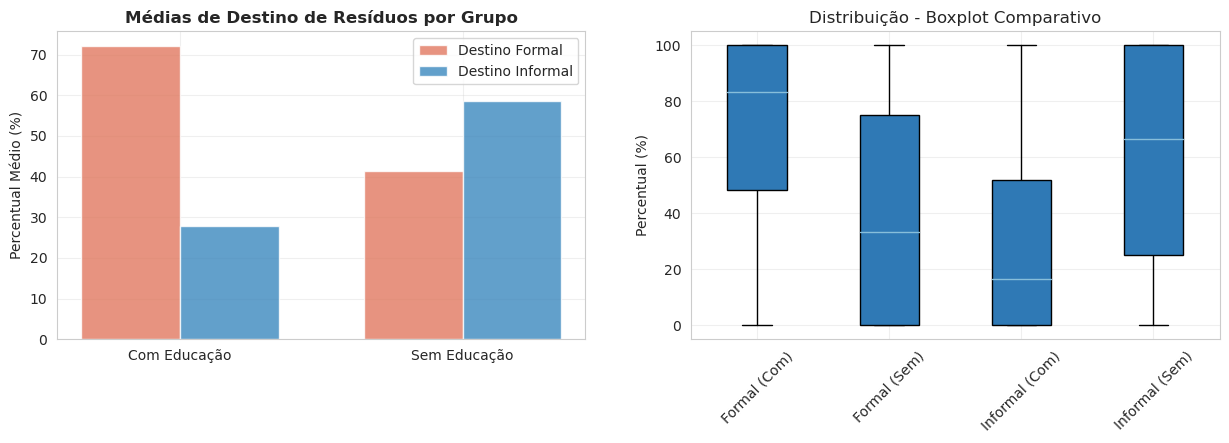

In [15]:
# Graficos resumo estatisco geral
sns.set_palette("RdBu_r")

cores = sns.color_palette("RdBu_r",16)

sns.set_style("whitegrid")
plt.figure(figsize=(15,4 ))
plt.subplot(1, 2, 1)
categorias = ['Com Educação', 'Sem Educação']
formal_means = [estatisticas['Com Educação Ambiental']['Formal_mean'], 
                estatisticas['Sem Educação Ambiental']['Formal_mean']]
informal_means = [estatisticas['Com Educação Ambiental']['Informal_mean'], 
                  estatisticas['Sem Educação Ambiental']['Informal_mean']]

x = np.arange(len(categorias))
width = 0.35

plt.bar(x - width/2, formal_means, width, label='Destino Formal', color=cores[12], alpha=0.8)
plt.bar(x + width/2, informal_means, width, label='Destino Informal', color=cores[2], alpha=0.8)

plt.title('Médias de Destino de Resíduos por Grupo', fontweight='bold')
plt.ylabel('Percentual Médio (%)')
plt.xticks(x, categorias)
plt.legend()
plt.grid(True, alpha=0.3)

# Gráfico 2: Boxplot comparativo
plt.subplot(1, 2, 2)
dados_boxplot = [
    edu_sim['Percentual_Formal'],
    edu_nao['Percentual_Formal'],
    edu_sim['Percentual_Informal'],
    edu_nao['Percentual_Informal']
]
labels = ['Formal (Com)', 'Formal (Sem)', 'Informal (Com)', 'Informal (Sem)']

plt.boxplot(dados_boxplot, labels=labels,patch_artist=True)
plt.title('Distribuição - Boxplot Comparativo')
plt.ylabel('Percentual (%)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)


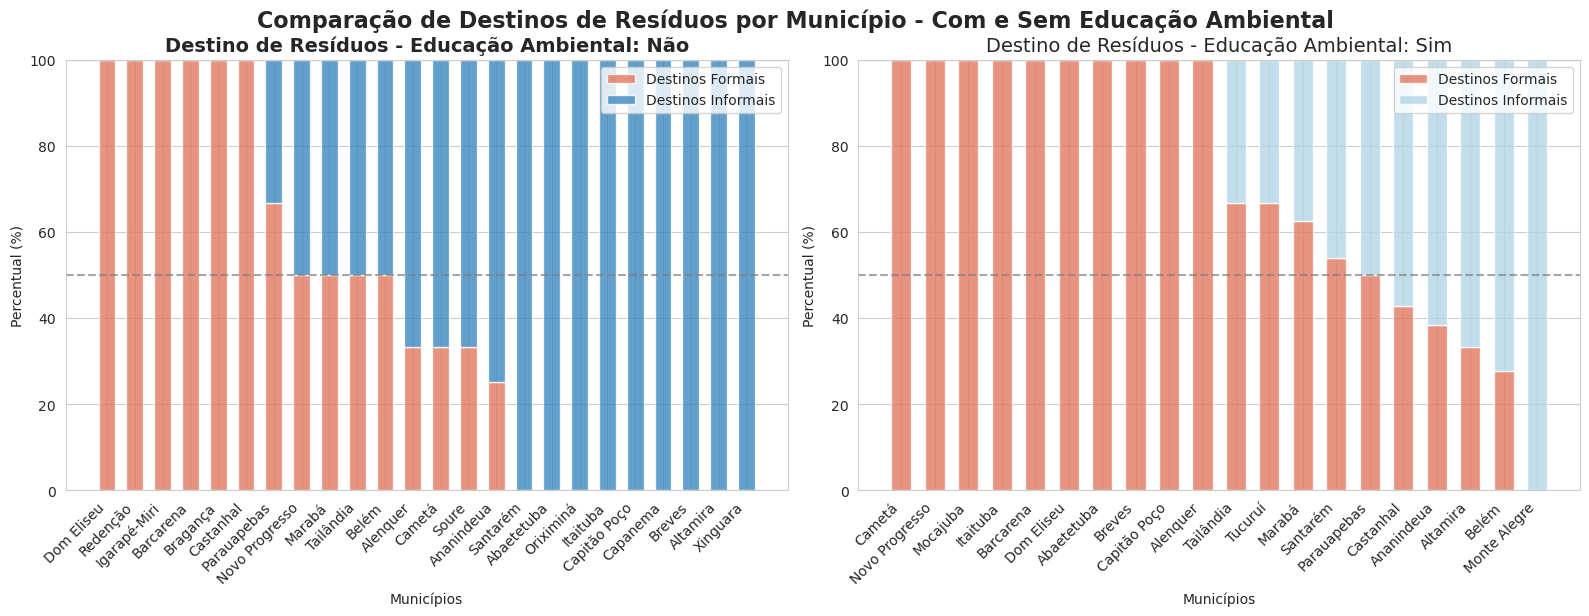

In [16]:
# graficos comparativos entre acesso a educação ambienta e destino do lixo
#cores = sns.color_palette("PuBuGn", 10)  # 2 cores
sns.set_palette("RdBu_r")
plt.figure(figsize=(16, 6))

# Primeiro subplot - Educação Ambiental: Não
plt.subplot(1, 2, 1)
municipios_nao = edu_nao['Municipio']
percentual_formal_nao = edu_nao['Percentual_Formal']
percentual_informal_nao = edu_nao['Percentual_Informal']

bar_width = 0.6
bars_formaln = plt.bar(municipios_nao, percentual_formal_nao, bar_width, 
                      label='Destinos Formais', color=cores[12],alpha=0.8)
bars_informaln = plt.bar(municipios_nao, percentual_informal_nao, bar_width, 
                        bottom=percentual_formal_nao, 
                        label='Destinos Informais', color=cores[2],alpha=0.8)

plt.title('Destino de Resíduos - Educação Ambiental: Não', fontsize=14, fontweight='bold')
plt.ylabel('Percentual (%)')
plt.xlabel('Municípios')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 100)
plt.legend()
plt.axhline(y=50, color='gray', linestyle='--', alpha=0.7)

# Segundo subplot - Educação Ambiental: Sim
plt.subplot(1, 2, 2)
municipios_sim = edu_sim['Municipio']
percentual_formal_sim = edu_sim['Percentual_Formal']
percentual_informal_sim = edu_sim['Percentual_Informal']

bars_formal = plt.bar(municipios_sim, percentual_formal_sim, bar_width, 
                     label='Destinos Formais', color=cores[12],alpha=0.8)
bars_informal = plt.bar(municipios_sim, percentual_informal_sim, bar_width, 
                       bottom=percentual_formal_sim, 
                       label='Destinos Informais', color=cores[5],alpha=0.8)

plt.title('Destino de Resíduos - Educação Ambiental: Sim', fontsize=14)
plt.ylabel('Percentual (%)')
plt.xlabel('Municípios')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 100)
plt.legend()
plt.axhline(y=50, color='gray', linestyle='--', alpha=0.7)

# Ajustar layout e adicionar título principal
plt.tight_layout()
plt.suptitle('Comparação de Destinos de Resíduos por Município - Com e Sem Educação Ambiental', 
             fontsize=16, fontweight='bold', y=1.02)
plt.show()


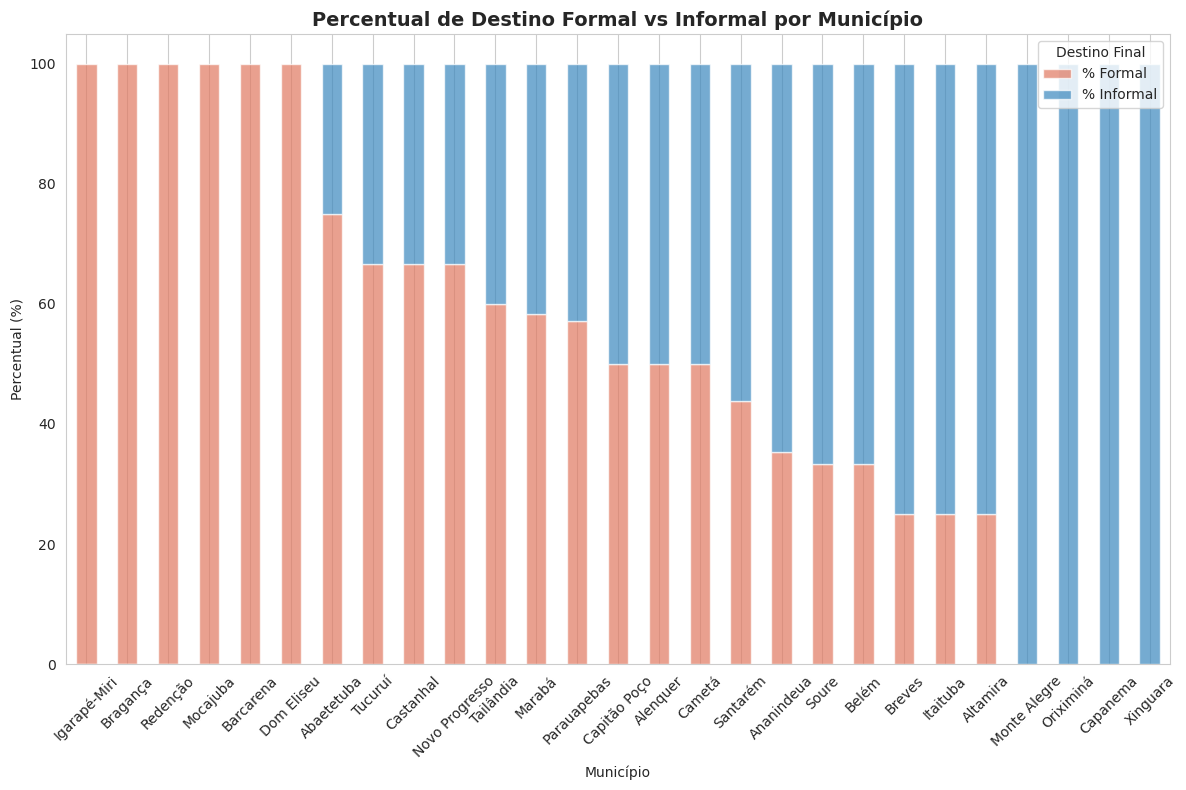

In [17]:
sns.set_palette("RdBu_r")

df_grouped = educacao_municipio.groupby('Municipio')[['Informal', 'Formal']].sum()

df_grouped['Total'] = df_grouped['Informal'] + df_grouped['Formal']
df_grouped['% Informal'] = (df_grouped['Informal'] / df_grouped['Total']) * 100
df_grouped['% Formal'] = (df_grouped['Formal'] / df_grouped['Total']) * 100

df_grouped=df_grouped.sort_values('% Formal', ascending=False)
# Plotar gráfico de barras empilhadas
ax = df_grouped[['% Formal', '% Informal']].plot(
    kind='bar', 
    stacked=True, 
    figsize=(12, 8),
    color=[cores[12], cores[2]],
    alpha=0.7
)

# Configurações do gráfico
plt.title('Percentual de Destino Formal vs Informal por Município', fontsize=14, fontweight='bold')
plt.xlabel('Município')
plt.ylabel('Percentual (%)')
plt.xticks(rotation=45)
plt.legend(title='Destino Final')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

### Comentários

A análise buscou avaliar como a presença de programas de educação ambiental influencia o destino final dos resíduos eletrônicos nos municípios da Amazônia.  

* Percentual de Descartes Formais e Informais
Os resultados mostram diferenças significativas entre os grupos com e sem educação ambiental:  

- **Com educação ambiental:**  
  - Percentual médio de descarte formal: 72,1%  
  - Desvio padrão: ±31,96%  
  - Mediana: 83,3%  
  - Percentual médio de descarte informal: 27,9%  

- **Sem educação ambiental:**  
  - Percentual médio de descarte formal: 41,3%  
  - Desvio padrão: ±40,3%  
  - Mediana: 33,3%  
  - Percentual médio de descarte informal: 58,7%  

Esses números indicam que municípios com programas de educação ambiental apresentam **maior proporção de resíduos destinados formalmente**, enquanto a ausência de educação ambiental está associada a um maior descarte informal.  

* Distribuição por Município
Os gráficos de barras empilhadas e boxplots mostram que, mesmo dentro de cada grupo, existe variabilidade significativa entre municípios, refletindo diferentes níveis de implementação de programas de educação ambiental, infraestrutura local e conscientização da população.  

- Alguns municípios com educação ambiental ainda apresentam percentuais baixos de descarte formal (ex.: Monte Alegre com 0%), indicando que a presença de programas isolados não garante necessariamente a destinação adequada.  
- Municípios sem educação ambiental apresentam ampla dispersão, com alguns registrando 100% de descarte formal e outros 0%, sugerindo possíveis vieses ou limitações nos dados.  

* Interpretação parcial
O conjunto de dados evidencia que **a educação ambiental exerce papel fundamental na promoção do descarte correto de resíduos eletrônicos**, aumentando a adesão a destinos formais. No entanto, **a variabilidade observada e a presença de extremos** indicam que outros fatores, como infraestrutura, logística de transporte e conscientização local, também influenciam os resultados.  

* **Conclusões parciais**
Promover educação ambiental é uma estratégia eficaz para aumentar a proporção de resíduos eletrônicos destinados formalmente. Contudo, **ações complementares** — como fortalecimento da infraestrutura de coleta e logística reversa — são necessárias para garantir que todos os municípios consigam reduzir o descarte informal de forma consistente.  

Os gráficos de barras empilhadas e boxplots fornecem uma visão clara dessas diferenças, permitindo identificar municípios prioritários para políticas públicas e intervenções educativas.


## 9-Correlação entre Origem e Tipo de Eletrônico
A origem do resíduo eletrônico pode estar associada ao tipo de dispositivo descartado. Grandes centros urbanos tendem a gerar computadores, smartphones e notebooks, enquanto áreas rurais podem descartar rádios, televisores antigos e baterias automotivas. Essa correlação ajuda a entender os padrões de consumo e de descarte.
Compreender tais relações é vital para desenhar políticas regionais: por exemplo, pontos de coleta de baterias em cidades pequenas ou centrais de reciclagem de computadores em polos universitários. Identificar as variáveis que caminham juntas pode revelar gargalos e oportunidades estratégicas.
1. Calcule a correlação entre origem (urbana/rural/industrial) e tipo de eletrônico usando análise de contingência (qui-quadrado).
2. Calcule a correlação entre origem (urbana/rural/industrial) e tipo de eletrônico usando análise de contingência (qui-quadrado)

In [18]:
from scipy.stats import chi2_contingency

# print(df.info())

# print('df[Origem]:',df['Origem'].unique())
# print('df[Tipo_Eletronico] :',df['Tipo_Eletronico'].unique())

tb_contingencia = pd.crosstab(df['Origem'], df['Tipo_Eletronico'])
print("Tabela de Contingência:")
print(tb_contingencia.to_markdown())
print("-" * 120)

#teste de qui-quadrado
chi2, p_valor, graus_liberdade, valores_esperados = chi2_contingency(tb_contingencia)

print(f"Resultado do Teste de Qui-Quadrado:")
print(f"Estatística de Qui-Quadrado: {chi2:.2f}")
print(f"p-valor: {p_valor:.6f}")
print(f"Graus de Liberdade: {graus_liberdade}")
print("-" * 50)


# 3. Interpretação dos resultados
alpha = 0.05
if p_valor < alpha:
    print("O p-valor é menor que 0.05. Rejeitamos a hipótese nula")
    print("Existe uma associação significativa entre Origem e Tipo_Eletronico.")
else:
    print(" O p-valor é maior que 0.05. Não rejeitamos a hipótese nula.")
    print("Não existe associação significativa entre Origem e Tipo_Eletronico.")



# 4. Calcular medidas de associação
n = tb_contingencia.sum().sum()
min_dim = min(tb_contingencia.shape) - 1

# Cramér's V
cramers_v = np.sqrt(chi2 / (n * min_dim))

# Interpretação do Cramér's V
if cramers_v < 0.1:
    interpretacao = "Associação muito fraca"
elif cramers_v < 0.3:
    interpretacao = "Associação fraca"
elif cramers_v < 0.5:
    interpretacao = "Associação moderada"
else:
    interpretacao = "Associação forte"
print(f"\nCramér's V= {cramers_v:.4f}: {interpretacao}")

Tabela de Contingência:
| Origem        |   bateria |   celular |   computador |   desconhecido |   geladeira |   impressora |   tablet |   tv |
|:--------------|----------:|----------:|-------------:|---------------:|------------:|-------------:|---------:|-----:|
| desconhecido  |         1 |         0 |            4 |              0 |           3 |            5 |        1 |    1 |
| governamental |         9 |         6 |            5 |              2 |          10 |            4 |        5 |    4 |
| industrial    |         4 |         4 |            4 |              3 |           3 |            1 |        6 |    3 |
| rural         |         6 |         3 |            3 |              2 |           3 |            5 |        2 |    3 |
| urbano        |         5 |         8 |            4 |              8 |           1 |            3 |        3 |    3 |
------------------------------------------------------------------------------------------------------------------------
Resultad

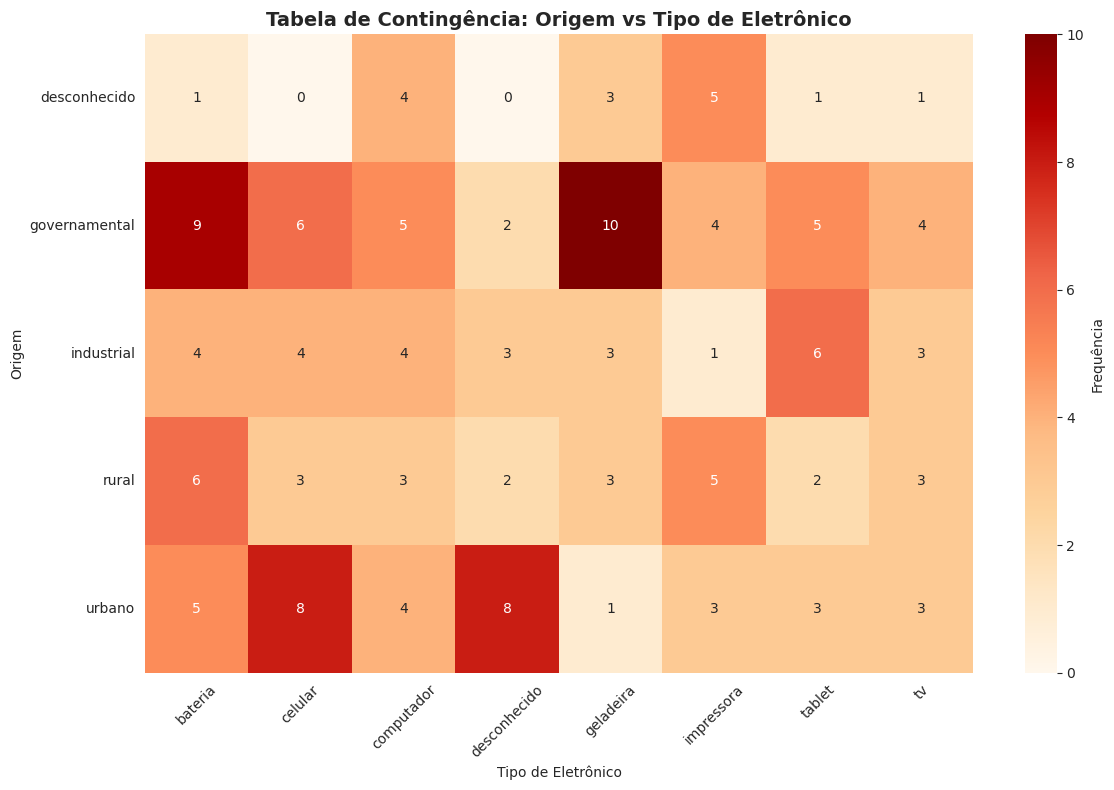

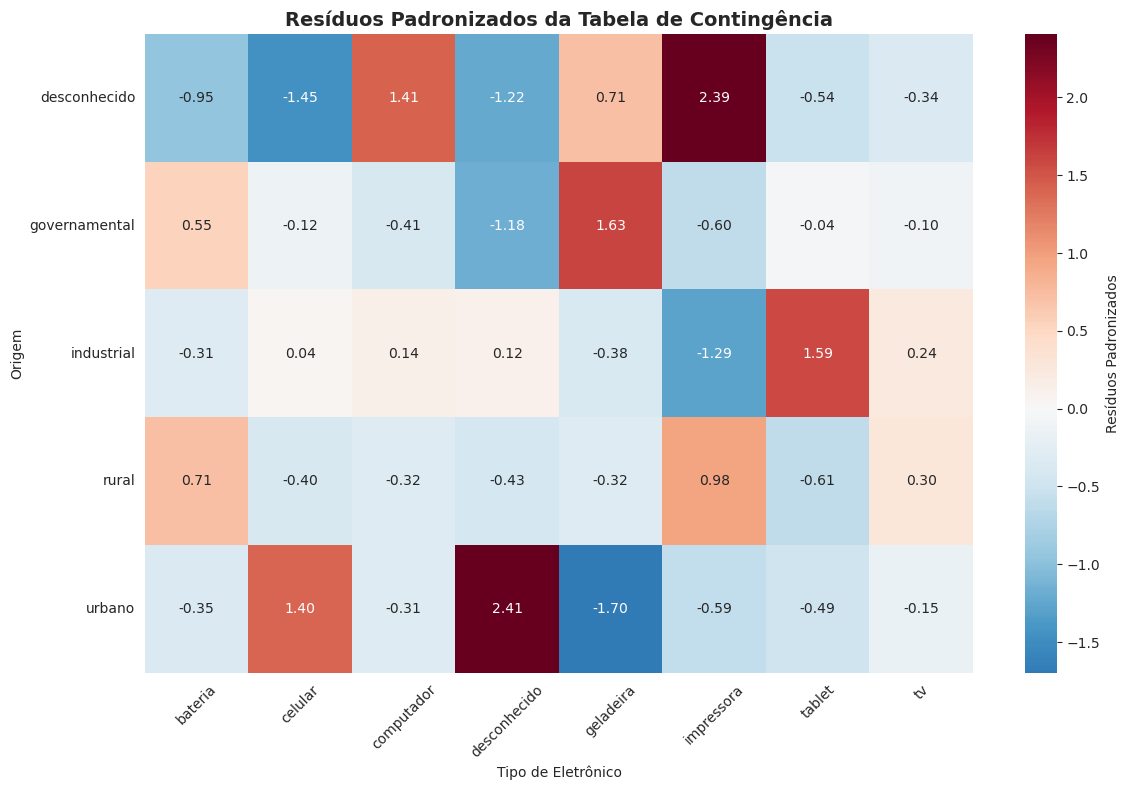


Percentuais por Origem tb_contingencia :
Tipo_Eletronico  bateria  celular  computador  desconhecido  geladeira  \
Origem                                                                   
desconhecido        6.67     0.00       26.67          0.00      20.00   
governamental      20.00    13.33       11.11          4.44      22.22   
industrial         14.29    14.29       14.29         10.71      10.71   
rural              22.22    11.11       11.11          7.41      11.11   
urbano             14.29    22.86       11.43         22.86       2.86   

Tipo_Eletronico  impressora  tablet     tv  
Origem                                      
desconhecido          33.33    6.67   6.67  
governamental          8.89   11.11   8.89  
industrial             3.57   21.43  10.71  
rural                 18.52    7.41  11.11  
urbano                 8.57    8.57   8.57  

Percentuais por Tipo de Eletrônico:
Tipo_Eletronico  bateria  celular  computador  desconhecido  geladeira  \
Origem       

In [19]:
# 5. Visualização da tabela de contingência (heatmap)
plt.figure(figsize=(12, 8))
sns.heatmap(tb_contingencia, 
            annot=True, 
            fmt='d', 
            cmap='OrRd',
            cbar_kws={'label': 'Frequência'})
plt.title('Tabela de Contingência: Origem vs Tipo de Eletrônico', fontsize=14, fontweight='bold')
plt.xlabel('Tipo de Eletrônico')
plt.ylabel('Origem')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


# 6. Visualização dos resíduos padronizados (opcional)
residuos = (tb_contingencia - valores_esperados) / np.sqrt(valores_esperados)
plt.figure(figsize=(12, 8))
sns.heatmap(residuos, 
            annot=True, 
            fmt='.2f', 
            cmap='RdBu_r',
            center=0,
            cbar_kws={'label': 'Resíduos Padronizados'})
plt.title('Resíduos Padronizados da Tabela de Contingência', fontsize=14, fontweight='bold')
plt.xlabel('Tipo de Eletrônico')
plt.ylabel('Origem')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



# 7. Percentuais por linha (Origem)
print("\nPercentuais por Origem tb_contingencia :")
percentuais_linha = tb_contingencia.div(tb_contingencia.sum(axis=1), axis=0) * 100
print(percentuais_linha.round(2))

# 8. Percentuais por coluna (Tipo_Eletronico)
print("\nPercentuais por Tipo de Eletrônico:")
percentuais_coluna = tb_contingencia.div(tb_contingencia.sum(axis=0), axis=1) * 100
print(percentuais_coluna.round(2))

### Comentários:

#### Resultados Principais

- **Associação significativa** entre origem e tipo de eletrônico (Teste de Qui-Quadrado, p < 0,05).  
- **Cramér's V = 0.42 → associação moderada**, indicando que a origem influencia o tipo de eletrônico descartado, mas com alguma variabilidade.

#### Padrões Observados

- **Urbano:** predomínio de celulares e computadores.  
- **Rural:** maior proporção de baterias, impressoras e televisores.  
- **Industrial/Governamental:** distribuição mais heterogênea, destacando computadores, tablets e geladeiras.  
- **Origem desconhecida:** concentração em impressoras e computadores.
*  Percentuais por Origem (exemplo resumido)

| Origem         | Bateria | Celular | Computador | Impressora | TV  |
|----------------|--------:|--------:|-----------:|-----------:|----:|
| Urbano         | 14%     | 23%     | 11%        | 9%         | 9%  |
| Rural          | 22%     | 11%     | 11%        | 19%        | 11% |
| Industrial     | 14%     | 14%     | 14%        | 4%         | 11% |
| Governamental  | 20%     | 13%     | 11%        | 9%         | 9%  |
| Desconhecido   | 7%      | 0%      | 27%        | 33%        | 7%  |

#### Insights Visuais

- **Heatmap da tabela de contingência:** evidencia quais tipos de eletrônicos são mais frequentes em cada origem.  
- **Resíduos padronizados:** destacam combinações que ocorrem acima ou abaixo do esperado.  
- **Percentuais por linha/coluna:** permitem identificar padrões locais e globais de descarte.

### Conclusão parcias

- A **origem do resíduo é um fator determinante** para o tipo de eletrônico descartado.  
- Estratégias regionais devem considerar esses padrões:  
  - **Coleta de baterias e TVs em áreas rurais**.  
  - **Centros de reciclagem de computadores e celulares em áreas urbanas**.  
- Apesar da associação moderada, **existem variações importantes** que podem indicar subnotificação ou dados incompletos, reforçando a necessidade de monitoramento contínuo.


## Atividade 10 – Insight Integrador e Proposta Estratégica**
* Revisite todas as análises anteriores (Atividades 1 a 9) e busque conexões entre os resultados. Pergunte-se: o que os padrões de peso, origem, destino, duplicidades e correlações revelam em conjunto? Existe um fator oculto ou um comportamento inesperado que precisa ser trazido à tona?
* Redija um relatório com no mínimo 250 palavras, apresentando um novo insight estratégico obtido a partir da integração de todos os resultados. O insight deve vir acompanhado de uma proposta prática, como: criação de pontos de coleta específicos, campanhas de educação, políticas de incentivo ou soluções logísticas para a Amazônia.

## 📄Relatório Técnico – Gestão de Lixo Eletrônico na Amazônia 🌳
A análise da base de dados sobre descarte de lixo eletrônico na Amazônia, composta por 150 registros e 11 variáveis, forneceu insights importantes sobre padrões de origem, tipo de eletrônico, peso, nível de toxicidade, custo de reciclagem, destino final, educação ambiental e distribuição municipal. Após a limpeza de dados, eliminação de valores nulos e padronização de categorias, foi possível realizar análises robustas que subsidiaram propostas estratégicas de política pública.

**🟢 Os principais achados incluem**:

* Setor Governamental como maior gerador de resíduos: 30% dos registros vêm de órgãos governamentais, seguido por áreas urbanas (23%) e industriais (21%).

* Predominância de itens críticos: Baterias (16,7%), celulares (14%) e computadores (13,3%) representam quase metade do total de resíduos, destacando prioridades para campanhas de coleta e reciclagem.

* Peso dos resíduos estável: O peso médio de 25,38 kg, com desvio padrão de 13,2 kg, mostra distribuição uniforme entre equipamentos, sem outliers significativos, e sem diferença relevante entre destinos formais e informais.

* Nível de toxicidade elevado: Apesar de equipamentos leves como baterias, os níveis de toxicidade são significativos, indicando que risco ambiental não é apenas função do peso, mas do tipo de material.

* Influência da educação ambiental: Municípios com programas educativos apresentam 72% de descarte formal, contra 41% em municípios sem educação ambiental.

* Destinos informais persistem em grandes centros: Belém e Ananindeua possuem alta quantidade de resíduos indo para lixões ou rios, mesmo com programas educativos, evidenciando gargalos logísticos.

**💡 Insight Estratégico Integrado**

A análise integrada das nove atividades revela um padrão oculto: existe um “gap logístico-educativo” que correlaciona origem, tipo de eletrônico, risco e destino final. Grandes centros urbanos e órgãos governamentais geram volumes significativos de resíduos críticos, mas sofrem com altos índices de descarte informal devido à ausência de infraestrutura e educação ambiental. Municípios menores com educação ambiental consistente conseguem maior proporção de descarte formal, mesmo com menor volume.

Este insight indica que o problema do lixo eletrônico na Amazônia não é apenas educacional ou logístico isoladamente, mas sim um fenômeno combinado, exigindo políticas públicas integradas.

### 🛠️ Propostas

1. **Pontos de Coleta Segmentados**
   * Centros urbanos: coleta de computadores, celulares e impressoras.
   * Municípios rurais: coleta de baterias, TVs e geladeiras.
   * Rotas logísticas otimizadas para transporte seguro de equipamentos pesados e tóxicos
2. **Campanhas Integradas de Educação Ambiental**
    * Associadas à localização de pontos de coleta.
    * Foco em conscientização sobre riscos de metais pesados e destinos corretos.
3. **Políticas de Incentivo e Responsabilidade do Fabricante**
    * Subsídios ou créditos para órgãos governamentais e empresas privadas que realizem descarte formal.
    * Parcerias com cooperativas e recicladores locais.
    * Adaptação de modelos de EPR inspirados em países como Alemanha, Japão e Coreia do Sul, responsabilizando fabricantes pelo destino final seguro de seus produtos
4. **Monitoramento Dinâmico**
   * Dashboards integrando origem, tipo, peso, destino e risco.
   * Identificação de municípios prioritários para intervenção rápida.
   * Avaliação contínua do impacto das campanhas e ajustes de rotas logísticas.
5. **Planejamento Regional Diferenciado**
    * Estratégias específicas para grandes centros urbanos, municípios médios e rurais.
    * Foco em redução de descarte informal em áreas críticas, sem negligenciar municípios menores que apresentam boas práticas.

O estudo evidencia que a gestão do lixo eletrônico na Amazônia deve ser multidimensional, considerando simultaneamente tipo de eletrônico, origem do resíduo, peso, risco tóxico, educação ambiental e infraestrutura logística. A integração desses fatores permite identificar padrões de risco, alocar recursos de forma estratégica e aumentar a taxa de descarte formal. A proposta de pontos de coleta segmentados, associada a campanhas educativas e monitoramento dinâmico, constitui uma abordagem prática e realista para reduzir impactos ambientais e proteger a saúde das populações amazônicas. O relatório reforça que políticas públicas isoladas não são suficientes; apenas uma abordagem integrada e orientada por dados pode transformar informação em ação eficaz, contribuindo para a preservação ambiental e para o cumprimento das metas de sustentabilidade na região amazônica.